# Table of Content

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [Introduction](#introduction)
  - [Objectives](#objective)
  - [Analysis steps](#analysis-steps)
  - [Data dictionary](#data-dictionary)
  - [Acknowledgments](#acknowledgements)
  - [Packages](#packages)
- [1-Data Exploration](#1-data-exploration)
- [2-Data Preprocessing](#2-data-preprocessing)
- [3-Analyses - ITT](#3-analyses)
  - [In Depth Exploratory Data Analysis]
  - [Attrition Analysis]
  - [Compliance Analysis]
  - [Data Imputation]
  - [Statistical Model]
  - [Assumptions]
- [4-Analyses - PP]
  - [In Depth Exploratory Data Analysis]
  - [Attrition Analysis]
  - [Compliance Analysis]
  - [Data Imputation]
  - [Statistical Model]
  - [Assumptions]
- [5-Sensitivity Analysis]
- [6-General Conclusion]

# 0-General
[Back to Table of Content](#table-of-content)
# Exploring the Effects of Hypnotherapy and Aromatherapy via MindspaceOne

## Introduction
[Back to Table of Content](#table-of-content)

The **MindspaceOne** project investigates the effects of combining hypnotherapy and aromatherapy, delivered via a smartphone-based platform, on individuals' ability to achieve targeted states of relaxation or concentration. As modern life grows increasingly stressful, particularly among younger individuals, there is a pressing need for accessible interventions to support mental health and well-being. This project seeks to evaluate whether coupling hypnotherapy with aromatherapy through classical conditioning can enhance the effectiveness of these interventions.

In this controlled, randomized experimental pilot study, participants are assigned to one of four groups: (I) Hypnotherapy + Aromatherapy, (II) Hypnotherapy alone, (III) Aromatherapy alone, or (IV) a control group. Over a 4-week period, participants will engage with the assigned treatment daily, followed by a 1-week test phase for conditioning effects in selected groups.

## Objective
[Back to Table of Content](#table-of-content)

The primary objective of this study is to assess whether daily hypnotherapy sessions, with or without aromatherapy, can improve participants' relaxation and concentration as measured by the **Multidimensional Mood Questionnaire (MDBF)** subscales. Secondary objectives include evaluating whether the effects of hypnotherapy can be conditioned to aromatherapy and exploring the influence of other variables such as age, gender, and stress levels.

## Hypotheses
#### Primary Hypothesis (H1):
- Hypnotherapy, delivered via a smartphone-based platform, enhances relaxation and concentration, as indicated by improvements on the MDBF subscales (calculated as the change from baseline to the end of the 4-week intervention).

#### Secondary Hypotheses:
1. Aromatherapy combined with hypnotherapy enhances the conditioning effect, where aromatherapy alone can trigger the same relaxation or concentration effects as hypnotherapy.
2. Exploratory analysis will examine the effects on perceived stress (PSS) and well-being (WHO-5), as well as the moderating role of age, gender, and socioeconomic status.


## Analysis steps
[Back to Table of Content](#table-of-content)

1. **In-Depth Exploratory Data Analysis:** Examine the structure and distribution of data. Identify outliers and assess relationships between variables. Visualize data for key insights.
2. **Attrition Analysis:** Assess dropout patterns and identify potential biases due to participant attrition.
3. **Compliance Analysis:** Evaluate adherence to the intervention protocols across groups to determine the consistency of treatments.
4. **Data Imputation:** Address missing data through multiple imputation techniques, ensuring robust statistical analysis.
5. **Model:** Fit a mixed effects model to evaluate changes over time and between groups for primary and secondary outcomes. Test for differences between groups using inferential statistics.
6. **Assumptions:** Validate statistical assumptions, including normality of residuals, homogeneity of variances, and absence of significant outliers.

## Data Dictionary
[Back to Table of Content](#table-of-content)

| Variable              | Description                                             | Data Type   |
|-----------------------|---------------------------------------------------------|-------------|
| Participant_ID        | Unique identifier for each participant                  | Character   |
| Group                 | Assigned intervention group (I, II, III, IV)            | Character   |
| V0_MDBF_WM            | Baseline score for Wakefulness-Fatigue (MDBF subscale)  | Numeric     |
| V0_MDBF_RU            | Baseline score for Calmness-Restlessness (MDBF subscale)| Numeric     |
| Daily_Session_Usage   | Count of sessions completed daily                       | Numeric     |
| Aroma_Used            | Binary indicator for aromatherapy use (1 = Yes, 0 = No)| Binary      |
| VAS_Preload_Relax     | Pre-treatment relaxation score (Visual Analog Scale)    | Numeric     |
| VAS_Postload_Relax    | Post-treatment relaxation score (Visual Analog Scale)   | Numeric     |
| ...                   | ...                                                     | ...         |

## Acknowledgements
[Back to Table of Content](#table-of-content)

We extended our gratitude to Priv.-Doz. Dr. Michael Teut for his invaluable contribution to the execution of this study. We also express gratitude to the entire research group of [Prof. Dr. med. Seifert](https://kinderonkologie.charite.de/forschung/ag_seifert/team/) and all participants for their invalubale contributions to this study as well as thanks to the funding agencies. Statistical analysis was conducted by Dr. Steven Schepanski, who also oversaw this notebook.


# Packages
[Back to Table of Content](#table-of-content)

In [56]:
# Define required packages
packages <- c("dplyr", "ggplot2", "tidyr", "readr", "purrr", "stringr",
              "lubridate", "data.table", "plyr", "reshape2", "MASS",
              "readxl", "mice", "gridExtra", "rlang", "glmmTMB", "DHARMa", "grid")

# Function to install and load packages silently
install_and_load <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) install.packages(pkg, quiet = TRUE)
  suppressPackageStartupMessages(library(pkg, character.only = TRUE, quietly = TRUE, warn.conflicts = FALSE))
}

# Apply function to all packages
invisible(lapply(packages, install_and_load))

In [4]:
# Define the working directory
path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/MindspaceOne"

In [6]:
# Read in data
mind <- read_csv(file.path(path, "data", "cleaned_mindspaceone_2025-Jan-30.csv"))

Rows: 6828 Columns: 64
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (13): Serial_Nr, Quest_Nr, questions_ended, viewer, my_group, gender, a...
dbl  (50): where_did_the_viewer_ended, where_did_the_participant_ended, prop...
dttm  (1): time_started

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1-Data Exploration
[Back to Table of Content](#table-of-content)

In [7]:
# Display the first rows and columns
head(mind)  # Shows the first 6 rows

Serial_Nr,Quest_Nr,time_started,questions_ended,viewer,where_did_the_viewer_ended,where_did_the_participant_ended,proportion_missing_answers,proportion_missing_answers_weighted,answering_speed,...,who5_5,pre_mood,pre_emotions,post_mood,post_emotions,aroma_received,aroma_tested,occupation,stressors,relaxation
<chr>,<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
LQC2G9NUZM,Sozio,2024-07-14 21:25:50,finished,participants,9,9,9,1,0.31,...,NA,NA,NA,NA,NA,NA,NA,Employee,Seated Work,Sport
QAW8A947WE,Sozio,2024-07-16 07:48:39,finished,participants,9,9,9,1,0.86,...,NA,NA,NA,NA,NA,NA,NA,Self-Employed,Weekend Work,Breathing Exercises
QAW8A947WE,V0,2024-07-16 07:51:46,finished,participants,13,13,0,0,1.20,...,6,NA,NA,NA,NA,NA,NA,NA,None,None
T7DET1M83P,Sozio,2024-07-16 08:07:08,finished,participants,9,9,18,11,0.51,...,NA,NA,NA,NA,NA,NA,NA,Retired,Seated Work,Sport
TL5FD2ZDNR,Sozio,2024-07-16 11:16:07,finished,participants,9,9,9,1,0.78,...,NA,NA,NA,NA,NA,NA,NA,Civil Servant,Children (0-6),None
QAW8A947WE,Int_0,2024-07-16 16:36:53,finished,participants,5,5,0,0,0.89,...,NA,6,9,6,7,NA,NA,NA,None,None


In [8]:
# Get and print the dimensions of the data frame (rows x columns)
cat("Dataset dimensions:", dim(mind)[1], "rows and", dim(mind)[2], "columns\n")

Dataset dimensions: 6828 rows and 64 columns


In [9]:
# Show the precise structure of the data frame
str(mind)

spc_tbl_ [6,828 x 64] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Serial_Nr                          : chr [1:6828] "LQC2G9NUZM" "QAW8A947WE" "QAW8A947WE" "T7DET1M83P" ...
 $ Quest_Nr                           : chr [1:6828] "Sozio" "Sozio" "V0" "Sozio" ...
 $ time_started                       : POSIXct[1:6828], format: "2024-07-14 21:25:50" "2024-07-16 07:48:39" ...
 $ questions_ended                    : chr [1:6828] "finished" "finished" "finished" "finished" ...
 $ viewer                             : chr [1:6828] "participants" "participants" "participants" "participants" ...
 $ where_did_the_viewer_ended         : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ where_did_the_participant_ended    : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ proportion_missing_answers         : num [1:6828] 9 9 0 18 9 0 0 0 0 0 ...
 $ proportion_missing_answers_weighted: num [1:6828] 1 1 0 11 1 0 0 0 0 0 ...
 $ answering_speed                    : num [1:6828] 0.31 0.86 1.2 0.51 0.78 0.89 0.49 0.39 0.61 1

In [10]:
# Define columns that should be factors
factor_columns <- c("occupation", "stressors", "relaxation", "Serial_Nr", "Quest_Nr", 
                    "questions_ended", "viewer", "my_group", "gender", "age_group", 
                    "education", "educational_degree", "income")


In [11]:
# Convert selected columns to factors
mind[factor_columns] <- lapply(mind[factor_columns], as.factor)

In [12]:
# Check for duplicate rows and print their number
num_duplicates <- sum(duplicated(mind))
cat("Number of duplicate rows:", num_duplicates, "\n")

Number of duplicate rows: 0 


In [13]:
# Summarise the descriptive statistics
summary(mind)

      Serial_Nr       Quest_Nr     time_started                   
 M9D15QZTHW:  24   Sozio  : 518   Min.   :2024-07-14 21:25:50.00  
 1FEZNADLLD:  23   Int_0  : 504   1st Qu.:2024-08-16 13:27:26.25  
 1YE5YTF21B:  23   V0     : 485   Median :2024-08-29 10:03:14.00  
 4KAGBXAS9G:  23   V1     : 392   Mean   :2024-09-01 22:32:07.25  
 5RBHK9PVH2:  23   V2     : 383   3rd Qu.:2024-09-13 10:34:03.50  
 6ZZGPWBXRD:  23   Int_3  : 313   Max.   :2024-12-18 15:17:56.00  
 (Other)   :6689   (Other):4233                                   
     questions_ended          viewer     where_did_the_viewer_ended
 finished    :6559   participants:6828   Min.   : 0.000            
 not_finished: 269                       1st Qu.: 5.000            
                                         Median : 5.000            
                                         Mean   : 6.212            
                                         3rd Qu.: 8.000            
                                         Max.   :13.000 

In [16]:
# Overall count of missing values
total_missing <- sum(is.na(mind))
cat("Total missing values in dataset:", total_missing, "\n")

Total missing values in dataset: 270981 


The total number of missing values in the dataset, 270,981 NAs, represents all missing entries across all rows and columns. However, this number alone does not accurately reflect the actual amount of missing data in a meaningful way due to the structure of the dataset. Since each individual (Serial_Nr) appears multiple times in the dataset, corresponding to different assessment time points (Quest_Nr), some variables are only relevant at specific time points. As a result, it is expected that certain variables contain missing values at time points where they were not assessed.
Additionally, some variables are designed to be recorded only at baseline or follow-up assessments, meaning that missing values in those columns are not necessarily an indication of data loss but rather a natural consequence of the study design. A simple count of missing values across the dataset does not distinguish between these structural missing values, which are expected, and unexpected missing values, which may indicate non-response or data collection issues.

# 2-Data Preprocessing
[Back to Table of Content](#table-of-content)

In [41]:
# Calculate MDBF Subscales
mind <- mind %>%
  mutate(
    MDBF_GS = mdbf_l1_1 + mdbf_l1_4 + mdbf_l1_8 + mdbf_l2_11 + mdbf_l2_14 + mdbf_l2_16 + mdbf_l3_18 + mdbf_l3_21,
    MDBF_WM = mdbf_l1_2 + mdbf_l1_5 + mdbf_l1_7 + mdbf_l2_10 + mdbf_l2_13 + mdbf_l3_17 + mdbf_l3_20 + mdbf_l3_23,
    MDBF_RU = mdbf_l1_3 + mdbf_l1_6 + mdbf_l2_9 + mdbf_l2_12 + mdbf_l2_15 + mdbf_l3_19 + mdbf_l3_22 + mdbf_l3_24
  )

In [42]:
# Calculate MDBF Total Score (Hinz, A., Daig, I., Petrowski, K., & Brähler, E. (2012). 
# Die stimmung in der deutschen bevölkerung: referenzwerte für den mehrdimensionalen befindlichkeitsfragebogen MDBF. 
# PPmP-Psychotherapie· Psychosomatik· Medizinische Psychologie, 62(02), 52-57.)
mind <- mind %>%
  mutate(MDBF = MDBF_GS + MDBF_WM + MDBF_RU)

In [43]:
# Invert PSS items (assuming a scale from 1-5, adjust if necessary)
mind <- mind %>%
  mutate(
    pss4_inv = 6 - pss4,
    pss5_inv = 6 - pss5,
    pss7_inv = 6 - pss7,
    pss8_inv = 6 - pss8
  )

In [44]:
# Calculate PSS Subscales
mind <- mind %>%
  mutate(
    pss_helplessness = pss1 + pss2 + pss3 + pss6 + pss9 + pss10,
    pss_self_efficacy = pss4_inv + pss5_inv + pss7_inv + pss8_inv,
    pss_total = pss_helplessness + pss_self_efficacy
  )

In [45]:
# Calculate WHO-5 Total Score
mind <- mind %>%
  mutate(who5_total = who5_1 + who5_2 + who5_3 + who5_4 + who5_5)


In [47]:
# Remove individual questionnaire items (except for Serial_Nr and Quest_Nr)
questionnaire_items <- c(
  "mdbf_l1_1", "mdbf_l1_2", "mdbf_l1_3", "mdbf_l1_4", "mdbf_l1_5", "mdbf_l1_6", "mdbf_l1_7", "mdbf_l1_8",
  "mdbf_l2_9", "mdbf_l2_10", "mdbf_l2_11", "mdbf_l2_12", "mdbf_l2_13", "mdbf_l2_14", "mdbf_l2_15", "mdbf_l2_16",
  "mdbf_l3_17", "mdbf_l3_18", "mdbf_l3_19", "mdbf_l3_20", "mdbf_l3_21", "mdbf_l3_22", "mdbf_l3_23", "mdbf_l3_24",
  "pss1", "pss2", "pss3", "pss4", "pss5", "pss6", "pss7", "pss8", "pss9", "pss10",
  "who5_1", "who5_2", "who5_3", "who5_4", "who5_5", 
  "pss4_inv", "pss5_inv", "pss7_inv", "pss8_inv"
)

mind <- mind %>% dplyr::select(-all_of(questionnaire_items))

In [48]:
str(mind)


tibble [6,828 x 33] (S3: tbl_df/tbl/data.frame)
 $ Serial_Nr                          : Factor w/ 519 levels "146RGH2GBD","1814V6TDDA",..: 309 367 367 407 411 367 411 411 367 367 ...
 $ Quest_Nr                           : Factor w/ 23 levels "Int_0","Int_1",..: 19 19 20 19 19 1 20 1 1 2 ...
 $ time_started                       : POSIXct[1:6828], format: "2024-07-14 21:25:50" "2024-07-16 07:48:39" ...
 $ questions_ended                    : Factor w/ 2 levels "finished","not_finished": 1 1 1 1 1 1 1 1 2 1 ...
 $ viewer                             : Factor w/ 1 level "participants": 1 1 1 1 1 1 1 1 1 1 ...
 $ where_did_the_viewer_ended         : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ where_did_the_participant_ended    : num [1:6828] 9 9 13 9 9 5 13 5 3 5 ...
 $ proportion_missing_answers         : num [1:6828] 9 9 0 18 9 0 0 0 0 0 ...
 $ proportion_missing_answers_weighted: num [1:6828] 1 1 0 11 1 0 0 0 0 0 ...
 $ answering_speed                    : num [1:6828] 0.31 0.86 1.2 0.51 

In [49]:
unique(mind$Quest_Nr)

[1] Sozio    V0       Int_0    Int_1    Int_2    Int_3    Int_4    Int_5   
 [9] Int_6    V1       Int_7    Int_8    Int_9    Int_10   Int_11   Int_12  
[17] Int_13   V2       Int_W5_1 Int_W5_2 Int_W5_3 Int_W5_4 V3W5    
23 Levels: Int_0 Int_1 Int_10 Int_11 Int_12 Int_13 Int_2 Int_3 Int_4 ... V3W5

# 3-Analyses

## In-Depth Exploratory Data Analysis
[Back to Table of Content](#table-of-content)

In [107]:
# Increase the width and height of the plot
options(repr.plot.width = 30, repr.plot.height = 20)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

# Increase the base font size
theme_set(theme_bw(base_size = 20))

In [92]:
# ------------------------
# FILTER SOCIODEMOGRAPHIC DATA
# ------------------------
socio_data <- mind %>% 
    filter(Quest_Nr == "Sozio") %>%
    janitor::remove_empty(c("rows", "cols"))

# Filter out 'ADMIN' group
socio_data <- socio_data %>% filter(my_group != "ADMIN")

In [93]:
# ------------------------
# DISTRIBUTION ANALYSIS OF CATEGORICAL VARIABLES
# ------------------------
# Define sociodemographic variables
sociodemographic_vars <- c("gender", "age_group", "education", "educational_degree",
                           "income", "occupation", "stressors", "relaxation")

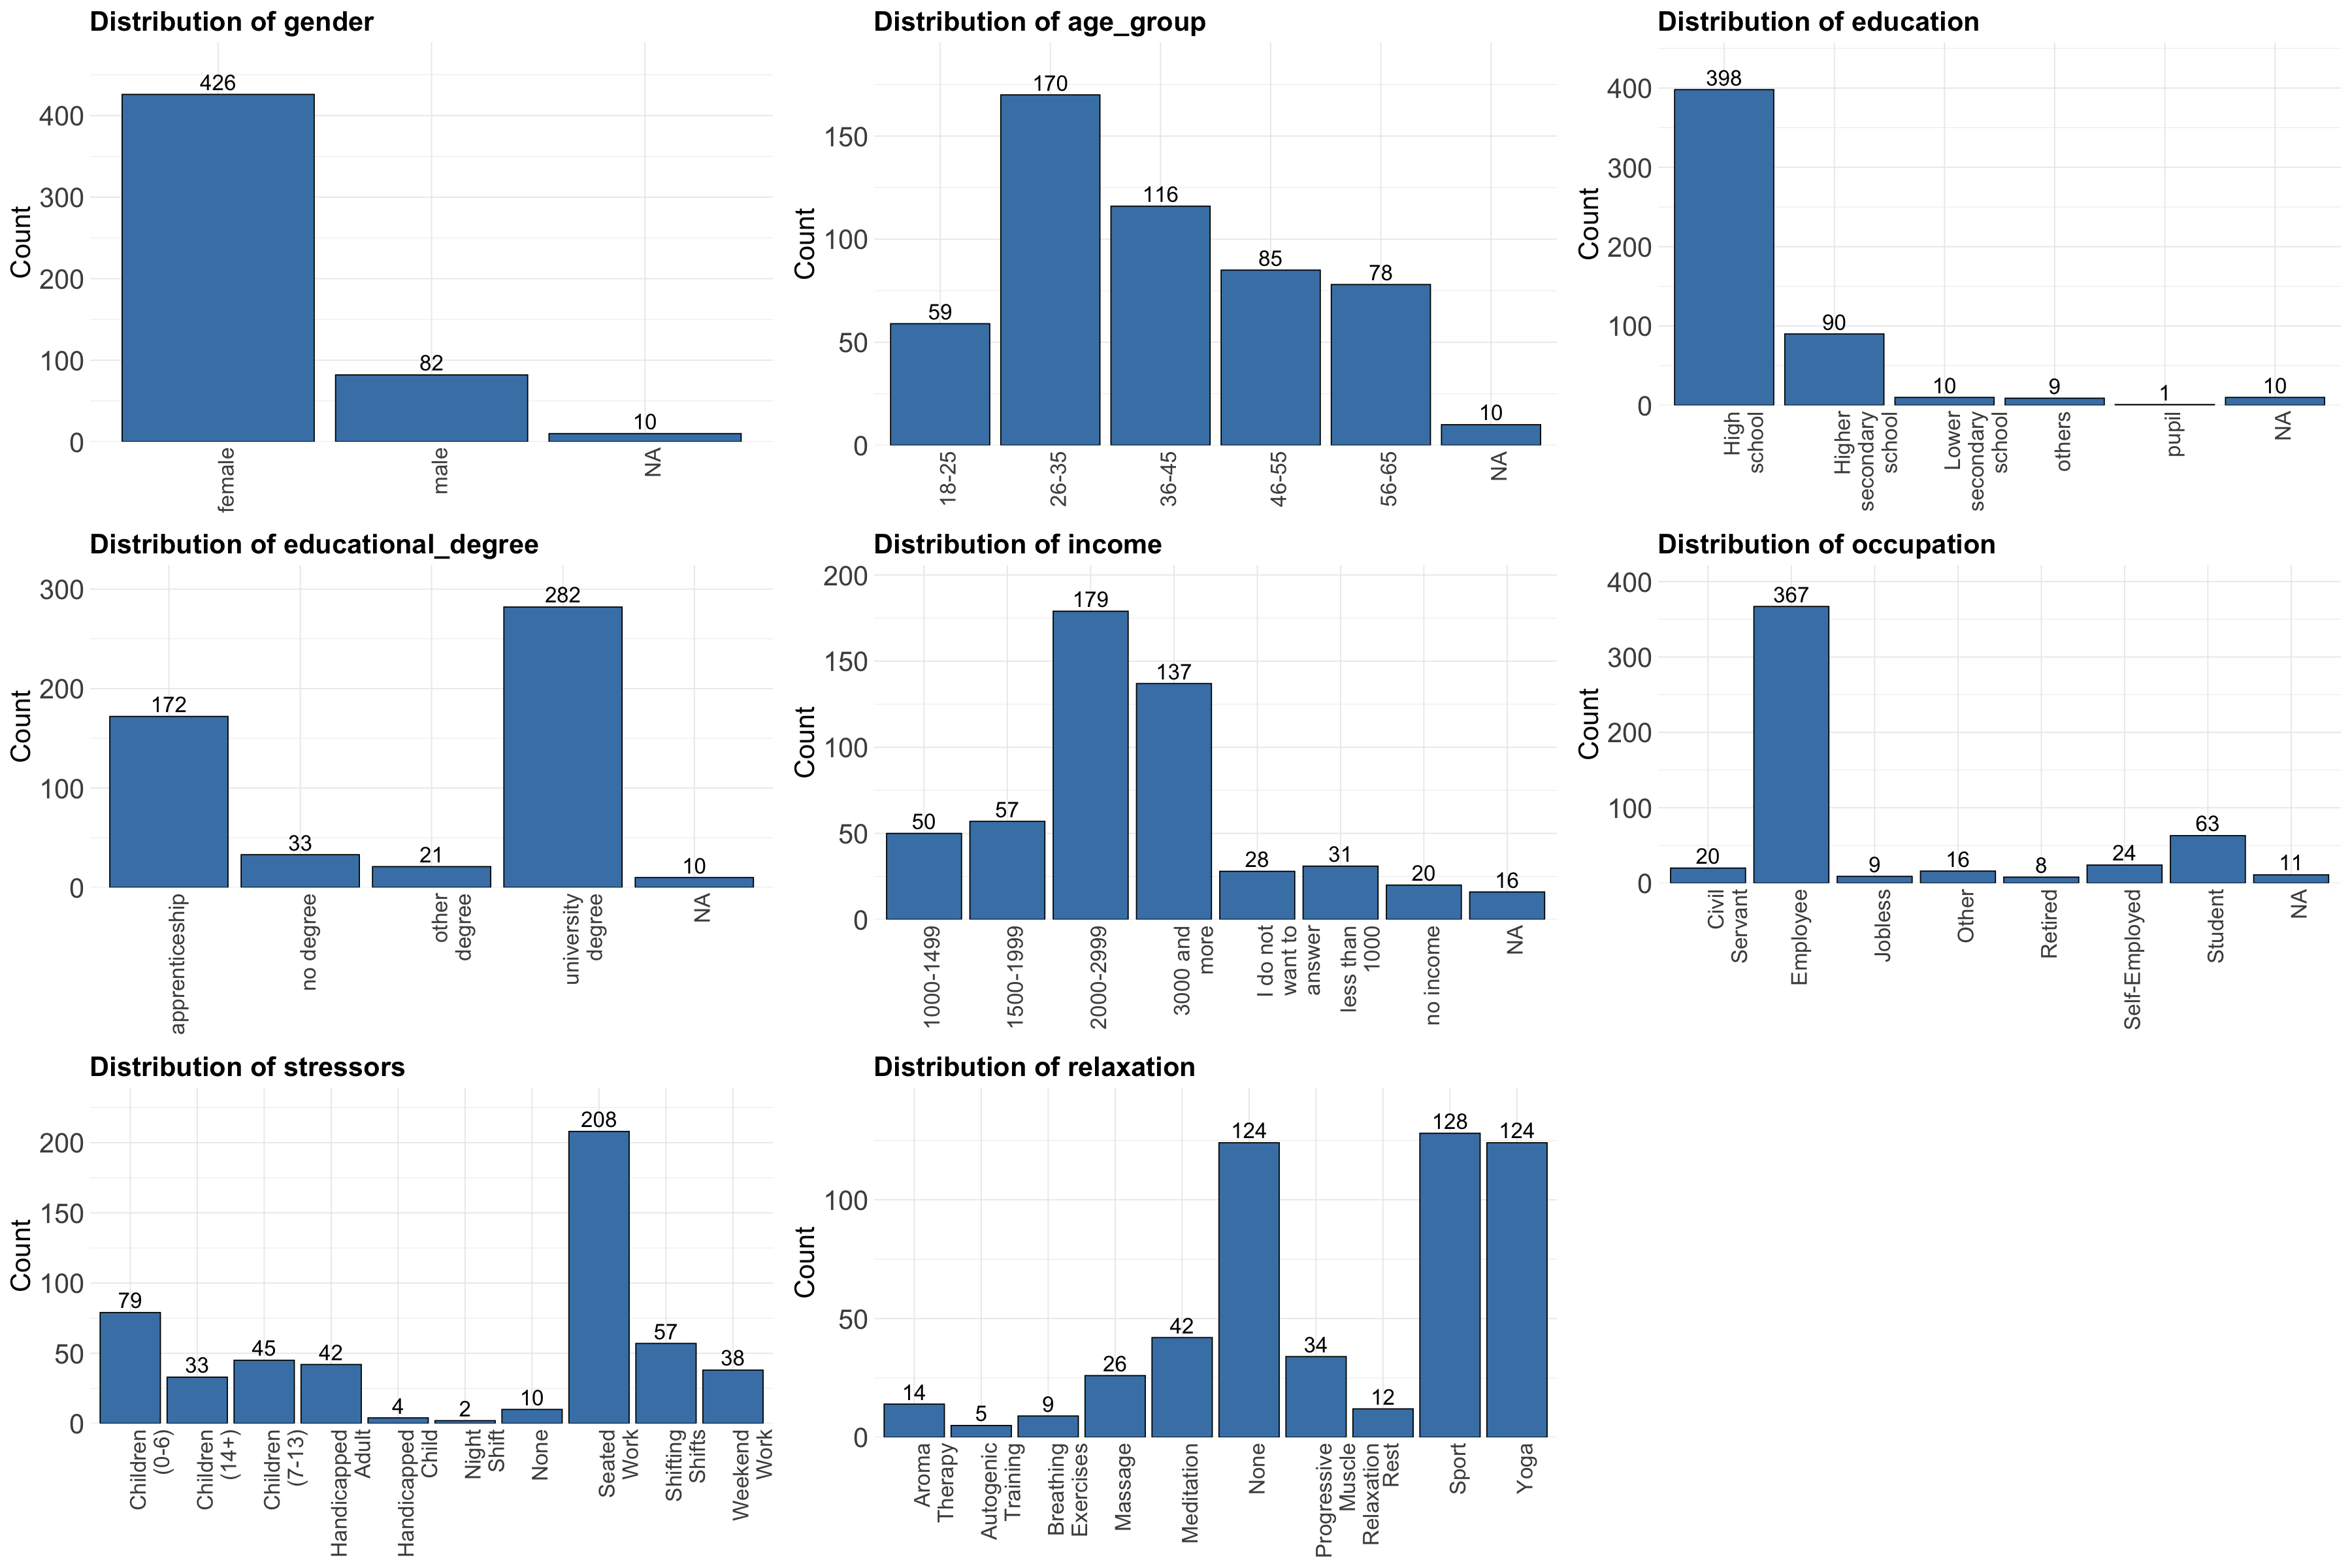

In [109]:
# Create individual plots and store them in a list with adjusted label positions
plots <- lapply(sociodemographic_vars, function(var) {
  ggplot(socio_data, aes(x = .data[[var]])) +
    geom_bar(fill = "steelblue", color = "black") +
    geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.3, size = 7) +  # Place counts just above bars
    theme_minimal() +
    labs(title = paste("Distribution of", var), x = NULL, y = "Count") +  # Suppress x-axis label
    scale_x_discrete(labels = function(x) str_wrap(x, width = 10)) +  # Wrap x-axis labels
    scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +  # Extend y-axis to leave space for counts
    theme(
      axis.text.x = element_text(angle = 90, hjust = 1, size = 20),  # Adjust x-axis text angle and size
      axis.text.y = element_text(size = 25),  # Adjust y-axis text size
      axis.title.y = element_text(size = 25),  # Adjust y-axis label size
      plot.title = element_text(size = 25, face = "bold"),
      plot.margin = margin(10, 10, 10, 10)  # Add spacing around each plot
    )
})

# Arrange plots in a 3-row, 3-column grid
grid.arrange(grobs = plots, nrow = 3, ncol = 3)

In [116]:
# Increase the width and height of the plot
options(repr.plot.width = 30, repr.plot.height = 7)

# Save the original plot size options
original_width <- getOption("repr.plot.width")
original_height <- getOption("repr.plot.height")

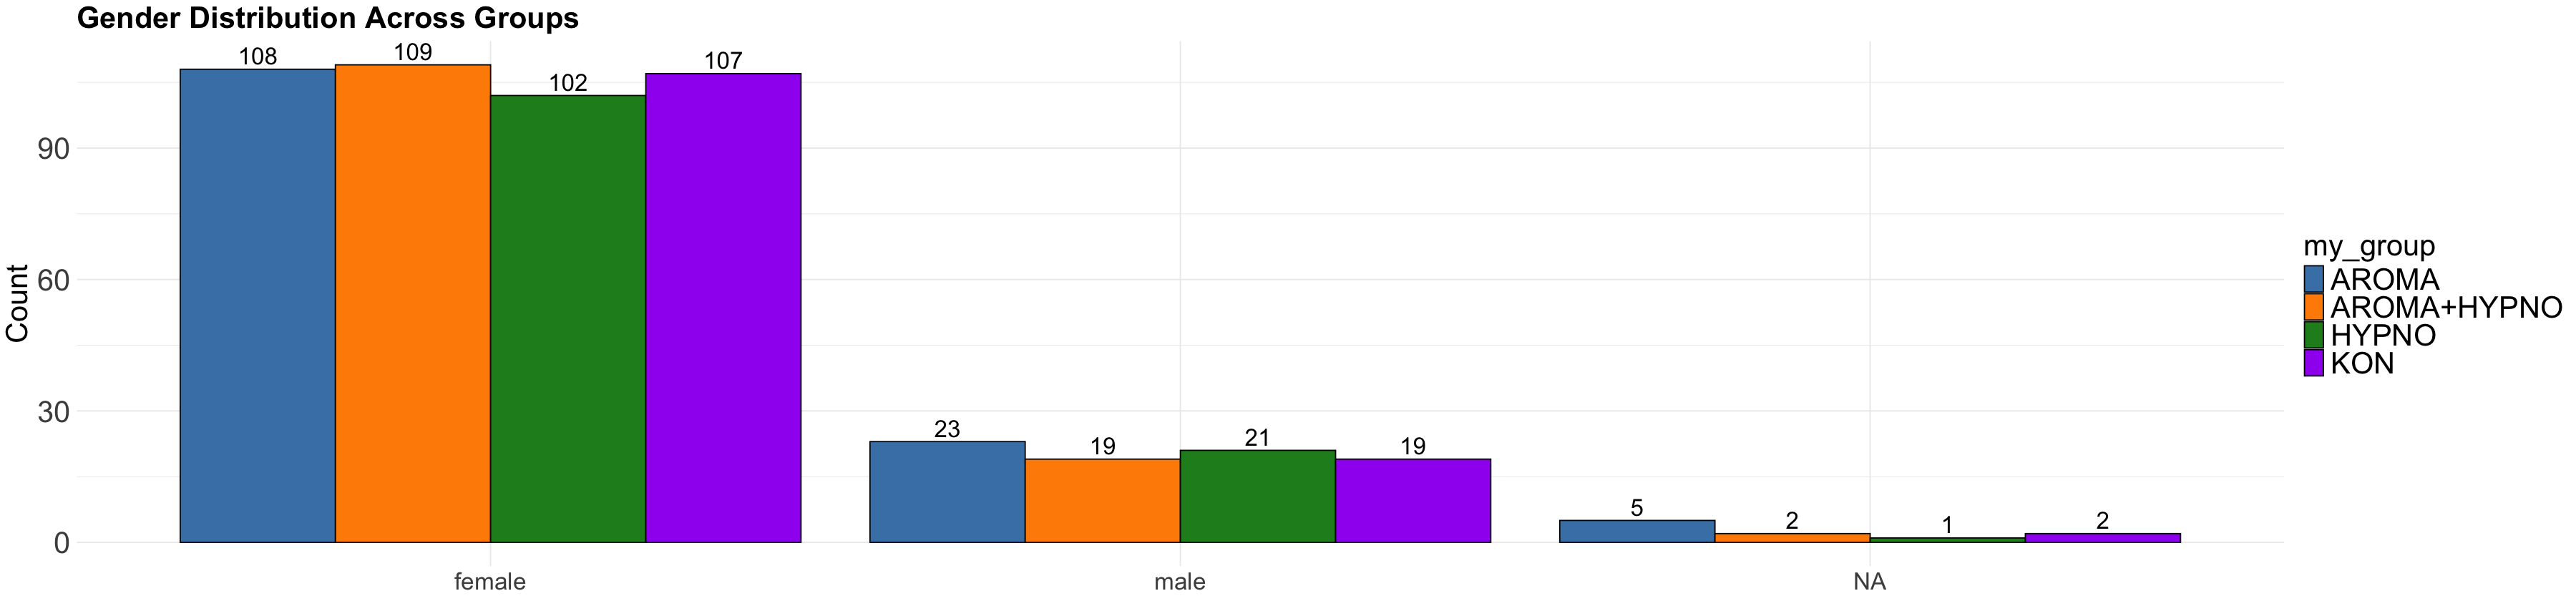

In [117]:
# Create the grouped bar plot for gender distribution across `my_group`
ggplot(socio_data, aes(x = gender, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Gender Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

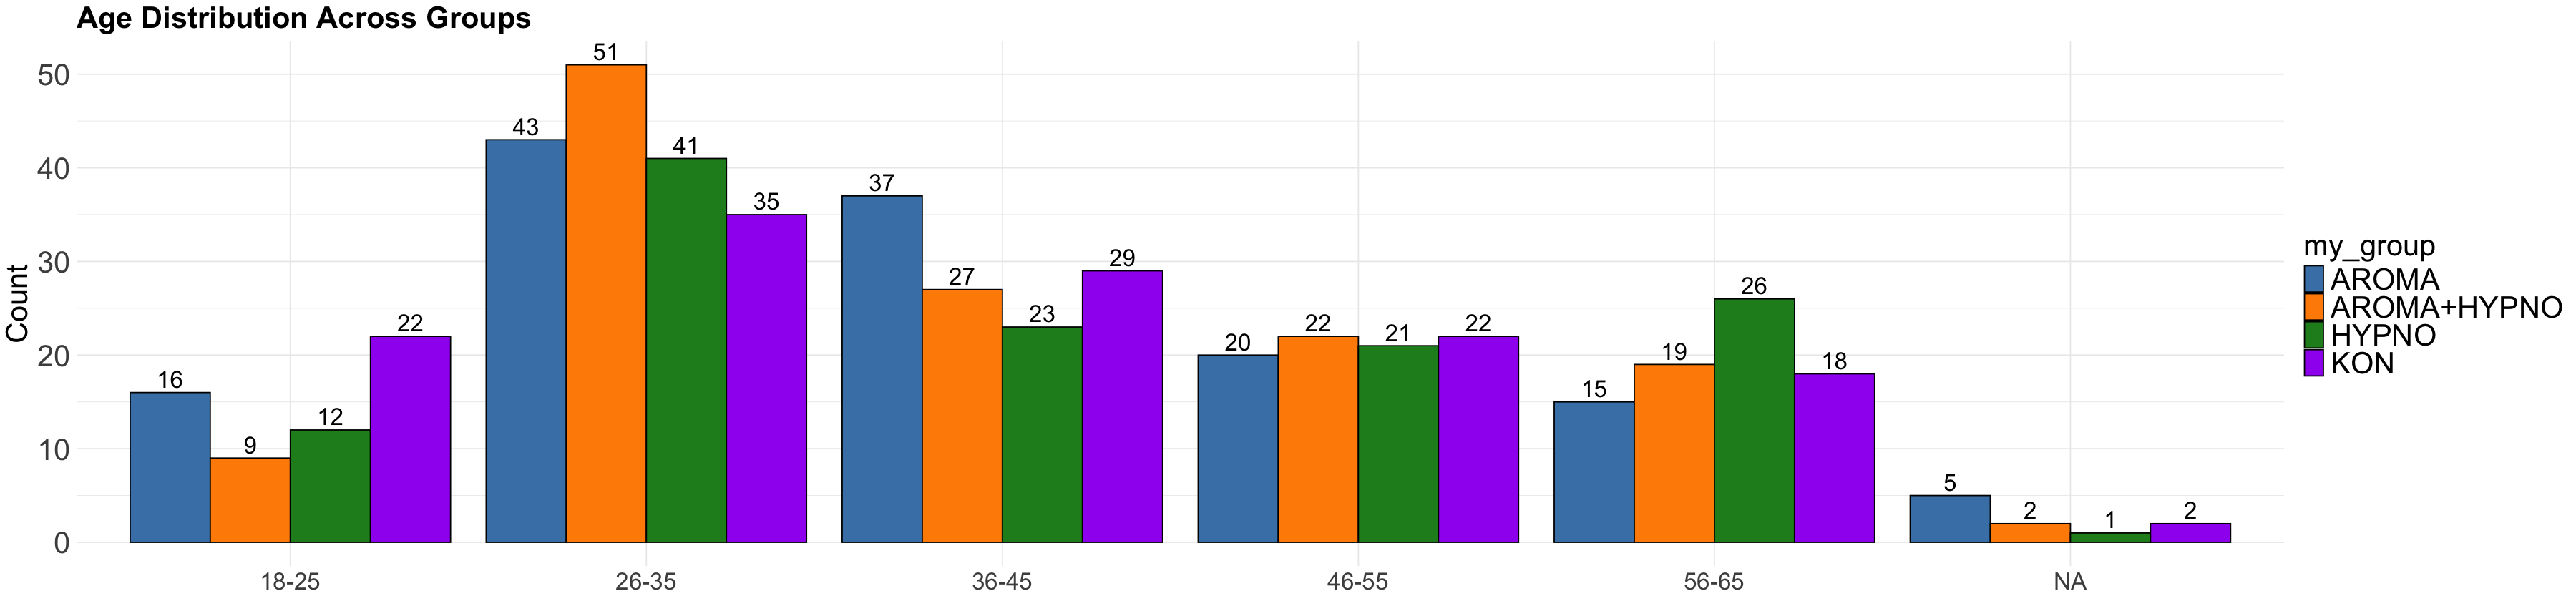

In [118]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = age_group, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Age Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

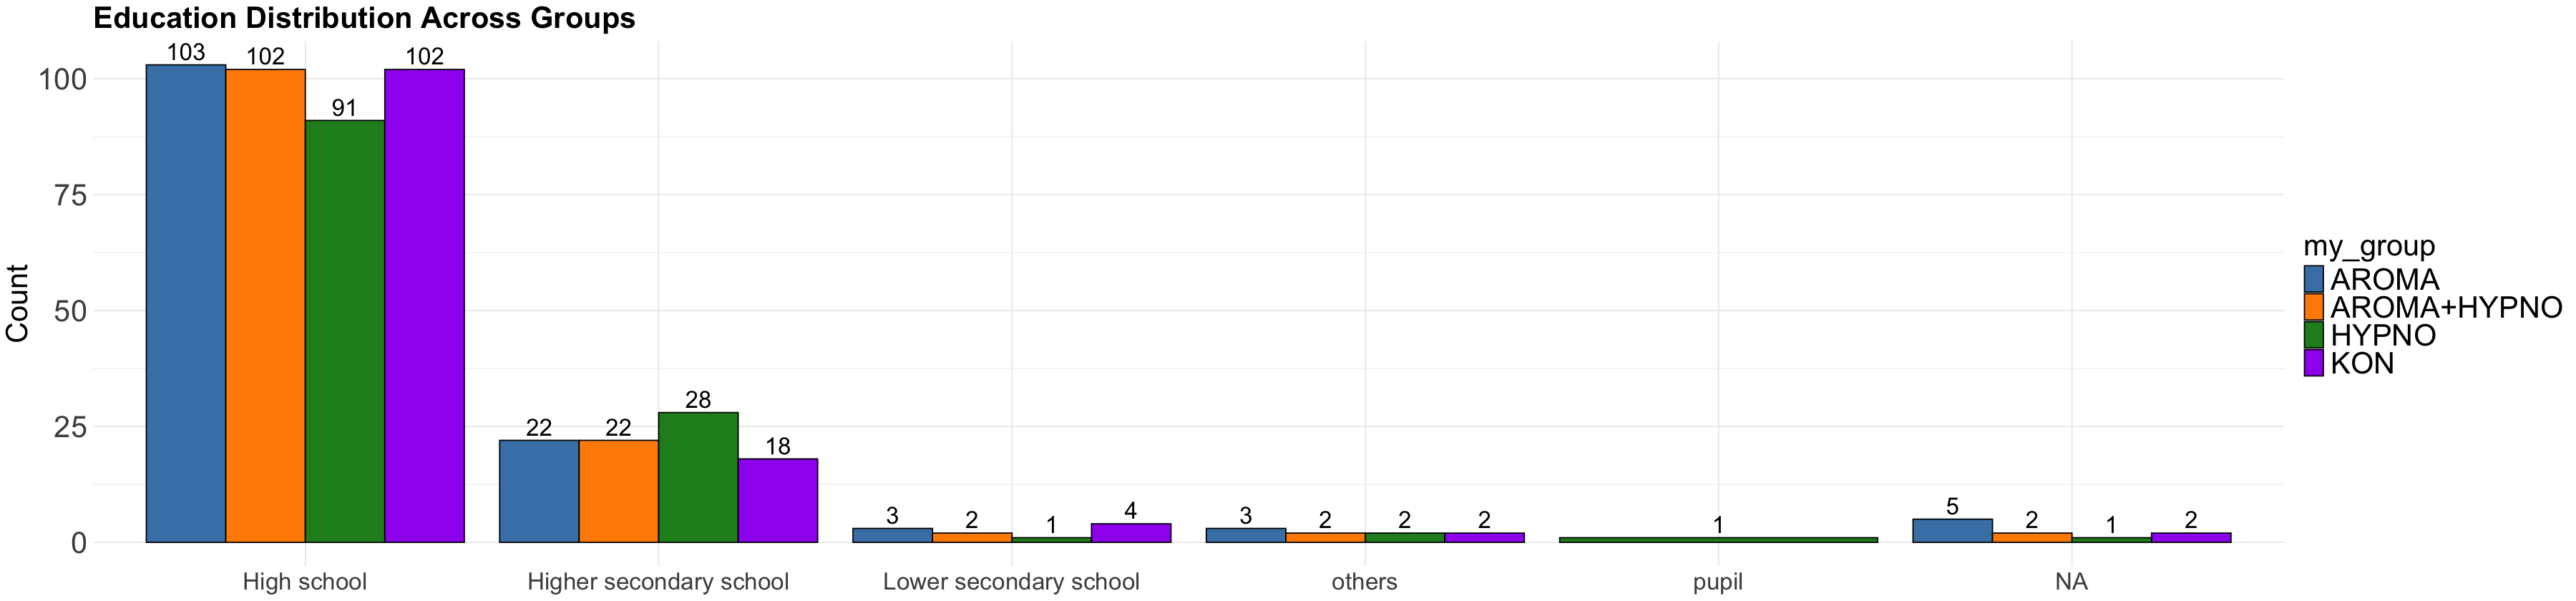

In [119]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = education, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Education Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

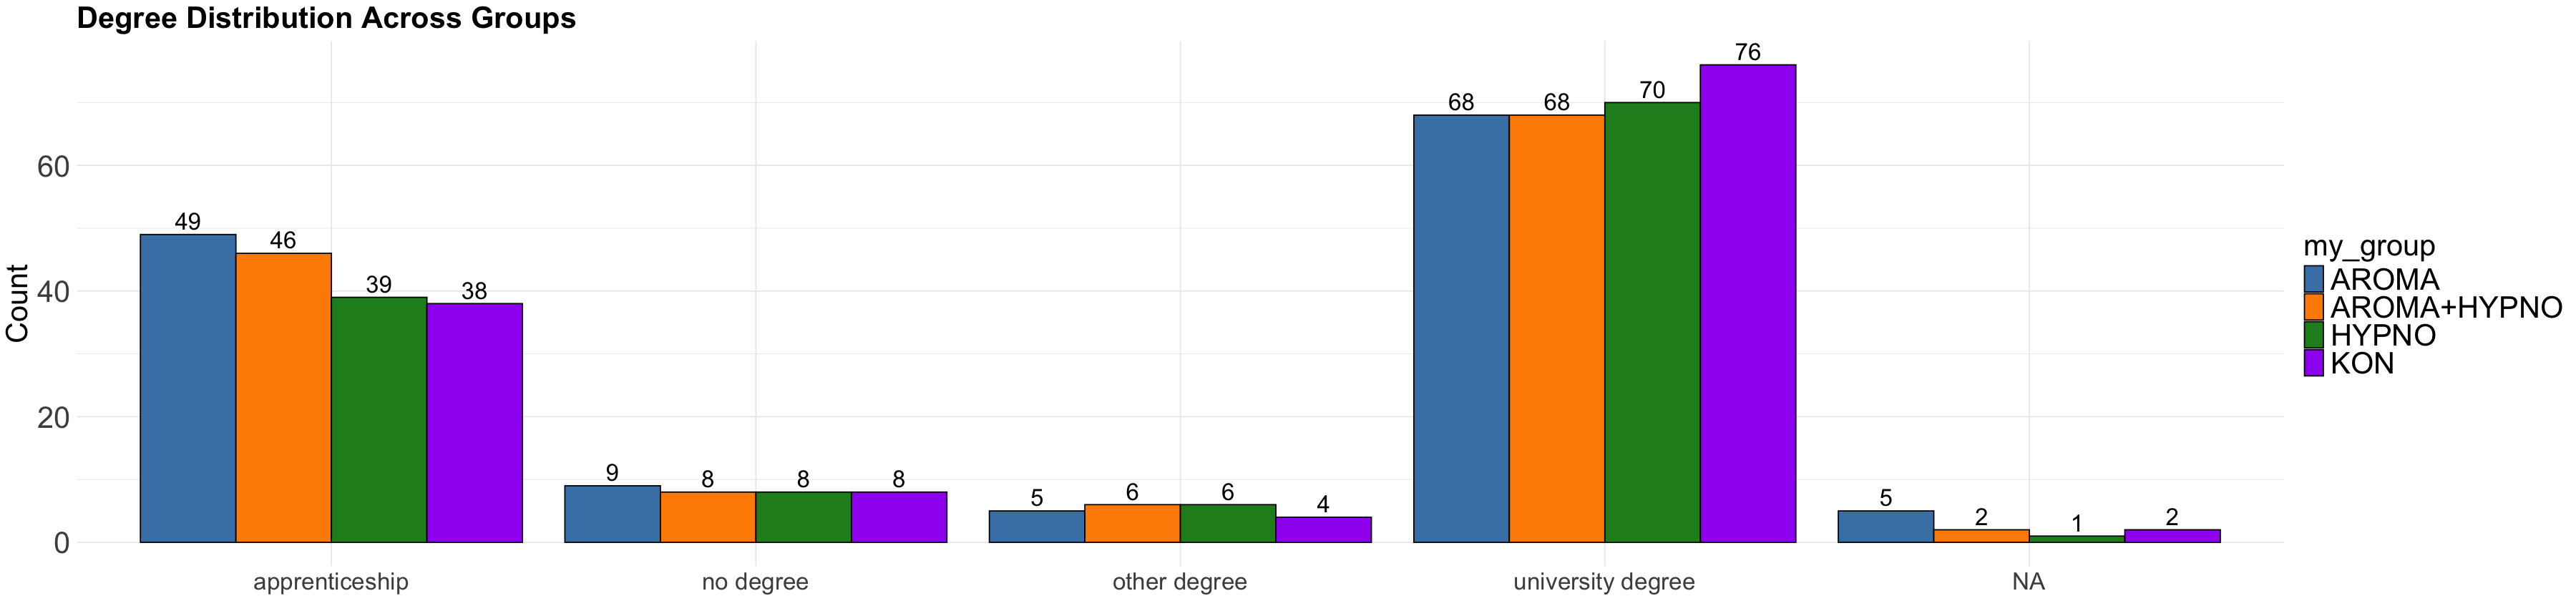

In [120]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = educational_degree, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Degree Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

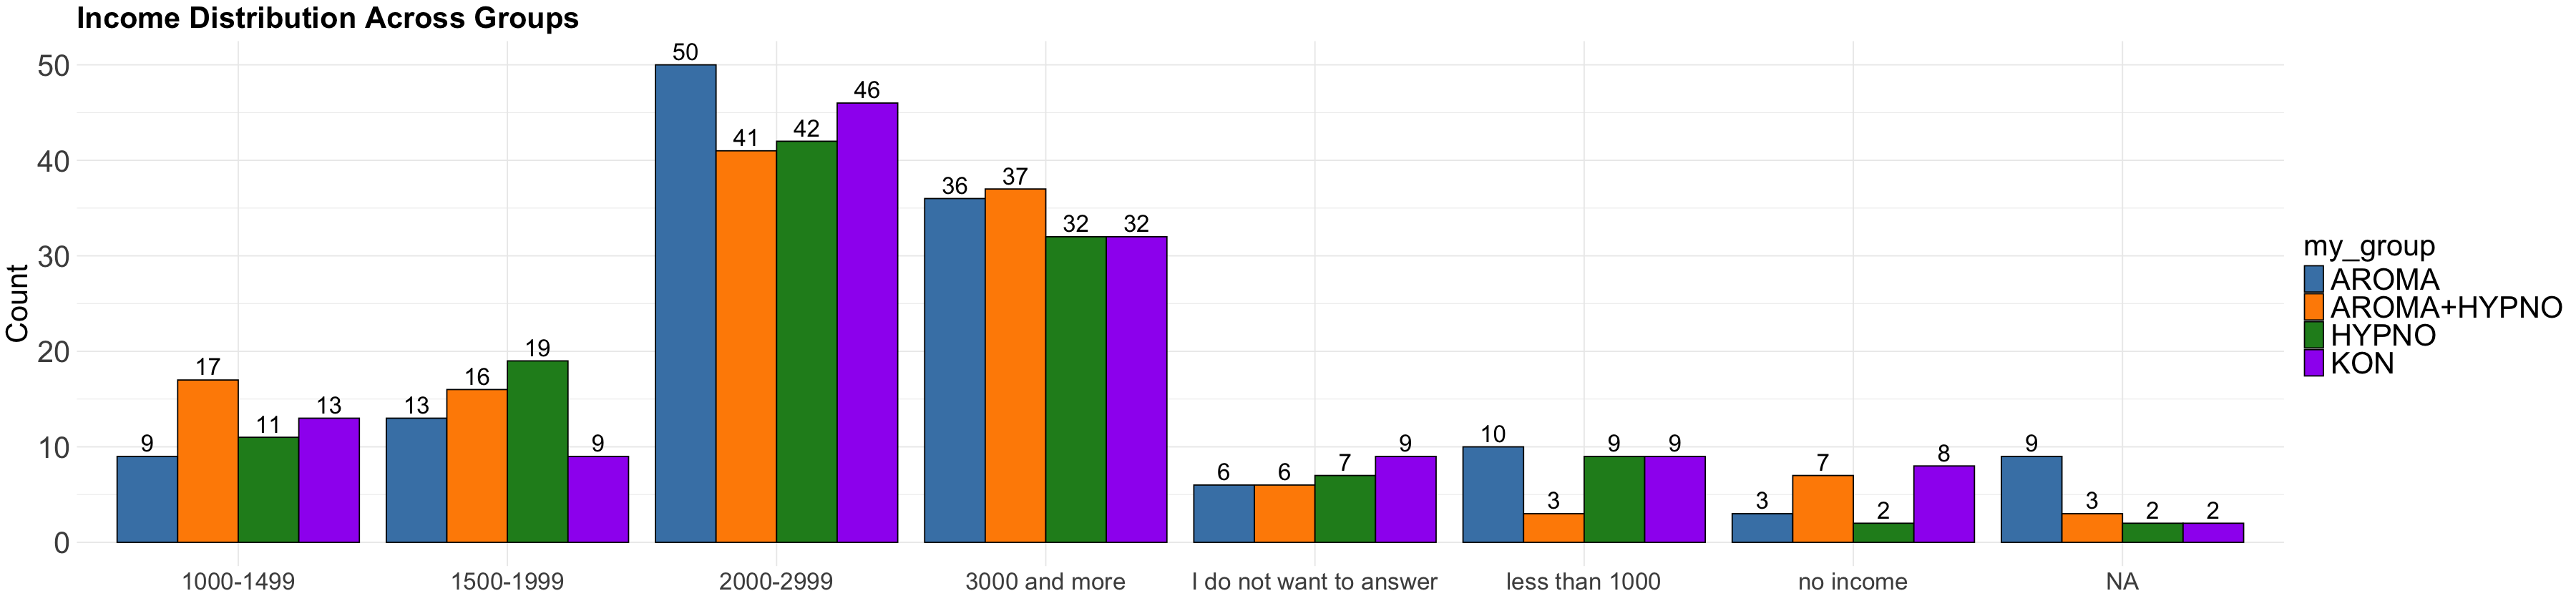

In [121]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = income, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Income Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

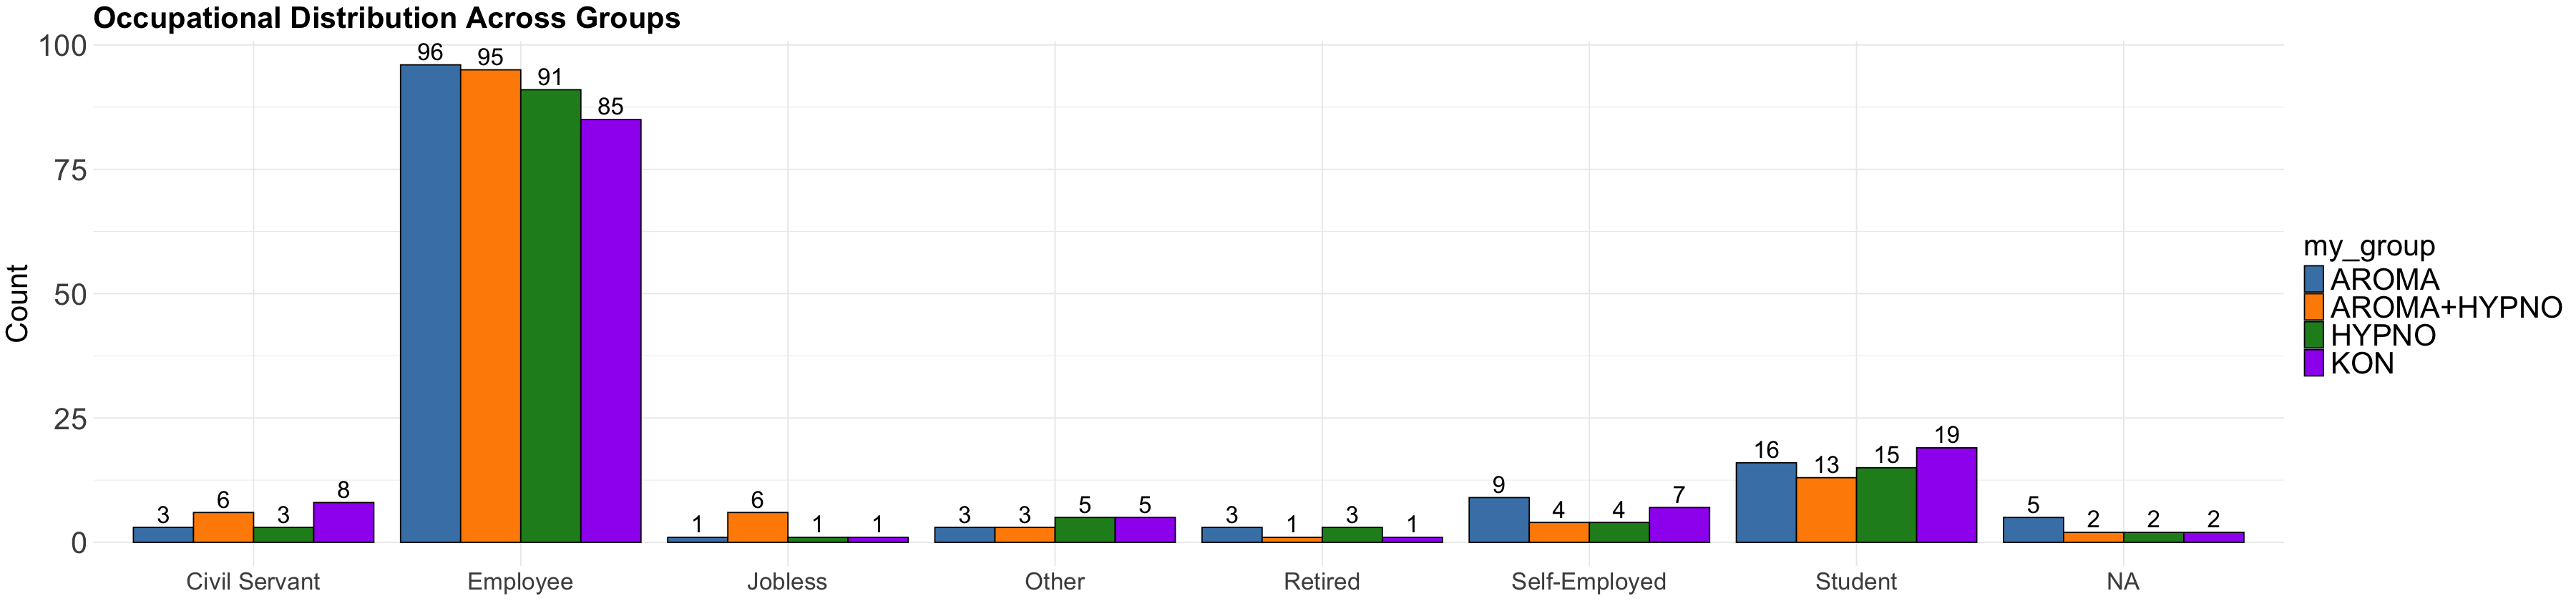

In [122]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = occupation, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Occupational Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

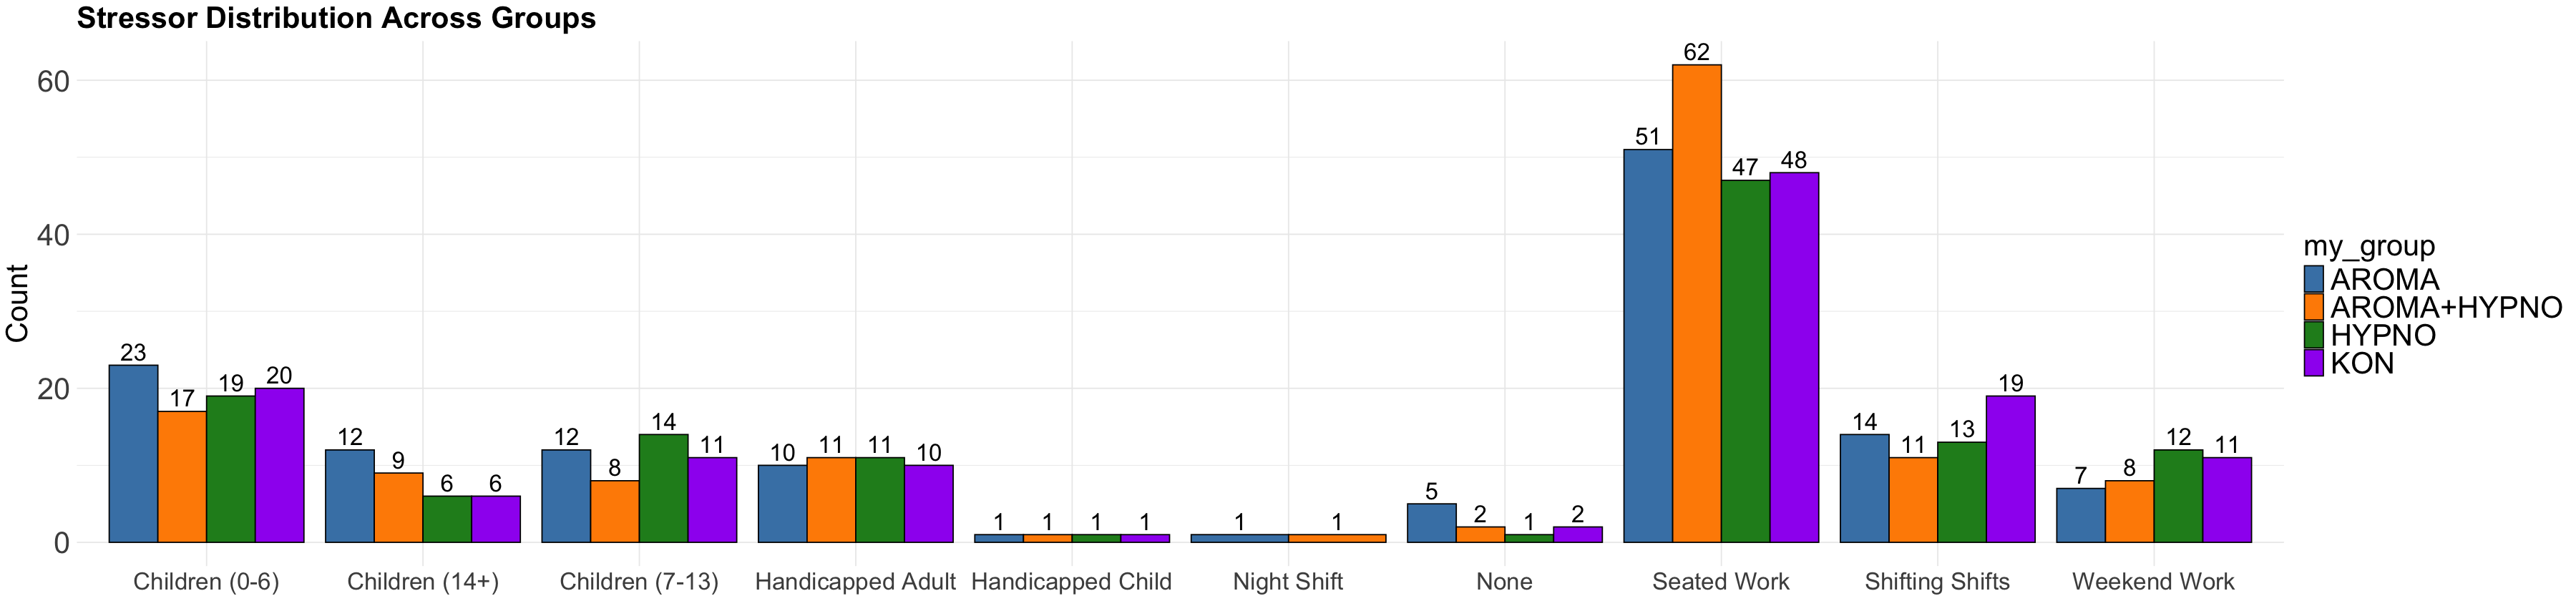

In [123]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = stressors, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Stressor Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

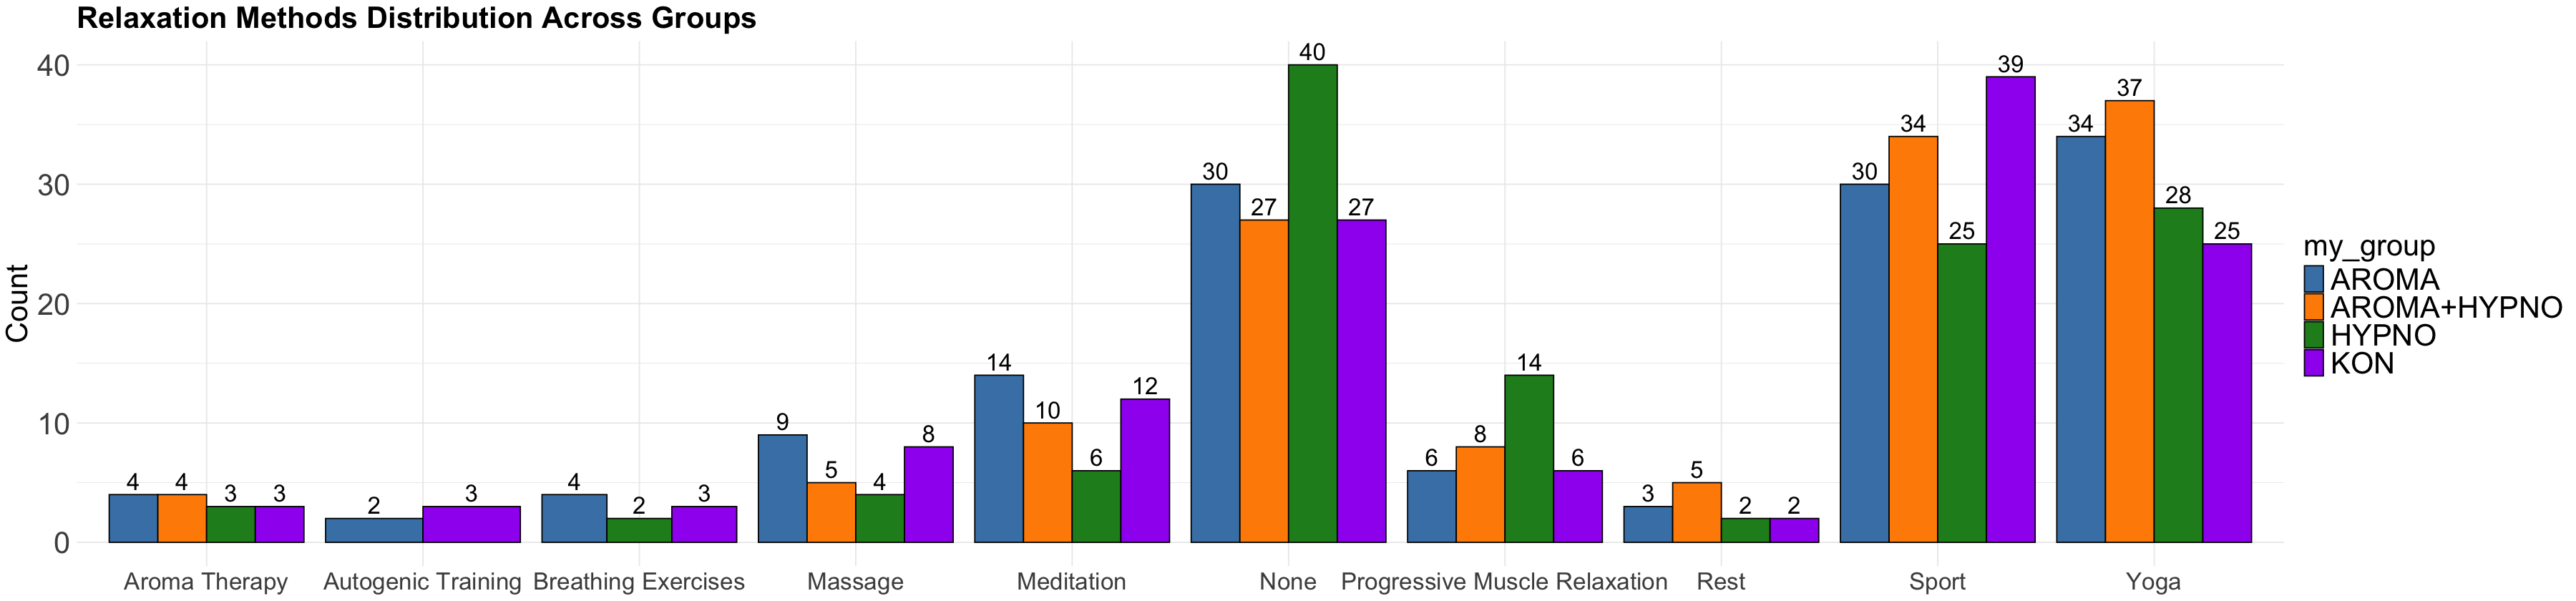

In [124]:
# Create the grouped bar plot for age distribution across `my_group`
ggplot(socio_data, aes(x = relaxation, fill = my_group)) +
  geom_bar(position = "dodge", color = "black") +  # Grouped bars with color borders
  geom_text(stat = "count", aes(label = after_stat(count)), 
            position = position_dodge(width = 0.9), vjust = -0.3, size = 7) +  # Add counts above bars
  theme_minimal() +
  labs(title = "Relaxation Methods Distribution Across Groups", x = NULL, y = "Count") +
  scale_fill_manual(values = c("AROMA" = "steelblue", "AROMA+HYPNO" = "darkorange", 
                               "HYPNO" = "forestgreen", "KON" = "purple")) +  # Custom colors for clarity
  theme(
    axis.text.x = element_text(size = 20, angle = 0),  # Adjust x-axis text size
    axis.text.y = element_text(size = 25),  # Adjust y-axis text size
    axis.title.x = element_text(size = 25),  # Adjust x-axis label size
    axis.title.y = element_text(size = 25),  # Adjust y-axis label size
    plot.title = element_text(size = 25, face = "bold"),
    legend.title = element_text(size = 25),  # Legend title size
    legend.text = element_text(size = 25)  # Legend text size
  )

In [156]:
# Total number of participants per group
total_per_group <- socio_data %>%
  filter(my_group != "ADMIN") %>%
  group_by(my_group) %>%
  dplyr::summarise(total_n = n(), .groups = "drop")

print("Total number of participants per group:")
print(total_per_group)

[1] "Total number of participants per group:"
# A tibble: 4 x 2
  my_group    total_n
  <fct>         <int>
1 AROMA           136
2 AROMA+HYPNO     130
3 HYPNO           124
4 KON             128


In [158]:
# Compute gender distribution with correct percentages
gender_per_group <- socio_data %>%
  group_by(my_group, gender) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, gender, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Gender Distribution Per Group:")
print(gender_per_group, n = Inf)  # Print all rows

[1] "Gender Distribution Per Group:"
# A tibble: 12 x 4
   my_group    gender     n percent
   <fct>       <fct>  <int>   <dbl>
 1 AROMA       female   108  79.4  
 2 AROMA       male      23  16.9  
 3 AROMA       NA         5   3.68 
 4 AROMA+HYPNO female   109  83.8  
 5 AROMA+HYPNO male      19  14.6  
 6 AROMA+HYPNO NA         2   1.54 
 7 HYPNO       female   102  82.3  
 8 HYPNO       male      21  16.9  
 9 HYPNO       NA         1   0.806
10 KON         female   107  83.6  
11 KON         male      19  14.8  
12 KON         NA         2   1.56 


In [160]:
# Age group per group
age_per_group <- socio_data %>%
  group_by(my_group, age_group) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, age_group, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Age Distribution Per Group:")
print(age_per_group, n = Inf)  # Print all rows

[1] "Age Distribution Per Group:"
# A tibble: 24 x 4
   my_group    age_group     n percent
   <fct>       <fct>     <int>   <dbl>
 1 AROMA       18-25        16  11.8  
 2 AROMA       26-35        43  31.6  
 3 AROMA       36-45        37  27.2  
 4 AROMA       46-55        20  14.7  
 5 AROMA       56-65        15  11.0  
 6 AROMA       NA            5   3.68 
 7 AROMA+HYPNO 18-25         9   6.92 
 8 AROMA+HYPNO 26-35        51  39.2  
 9 AROMA+HYPNO 36-45        27  20.8  
10 AROMA+HYPNO 46-55        22  16.9  
11 AROMA+HYPNO 56-65        19  14.6  
12 AROMA+HYPNO NA            2   1.54 
13 HYPNO       18-25        12   9.68 
14 HYPNO       26-35        41  33.1  
15 HYPNO       36-45        23  18.5  
16 HYPNO       46-55        21  16.9  
17 HYPNO       56-65        26  21.0  
18 HYPNO       NA            1   0.806
19 KON         18-25        22  17.2  
20 KON         26-35        35  27.3  
21 KON         36-45        29  22.7  
22 KON         46-55        22  17.2  
23 KON     

In [161]:
# Age group per group
education_per_group <- socio_data %>%
  group_by(my_group, education) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, education, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Education Distribution Per Group:")
print(education_per_group, n = Inf)  # Print all rows

[1] "Education Distribution Per Group:"
# A tibble: 21 x 4
   my_group    education                   n percent
   <fct>       <fct>                   <int>   <dbl>
 1 AROMA       High school               103  75.7  
 2 AROMA       Higher secondary school    22  16.2  
 3 AROMA       Lower secondary school      3   2.21 
 4 AROMA       others                      3   2.21 
 5 AROMA       NA                          5   3.68 
 6 AROMA+HYPNO High school               102  78.5  
 7 AROMA+HYPNO Higher secondary school    22  16.9  
 8 AROMA+HYPNO Lower secondary school      2   1.54 
 9 AROMA+HYPNO others                      2   1.54 
10 AROMA+HYPNO NA                          2   1.54 
11 HYPNO       High school                91  73.4  
12 HYPNO       Higher secondary school    28  22.6  
13 HYPNO       Lower secondary school      1   0.806
14 HYPNO       others                      2   1.61 
15 HYPNO       pupil                       1   0.806
16 HYPNO       NA                       

In [162]:
# Educational_degree group per group
education_degree_per_group <- socio_data %>%
  group_by(my_group, educational_degree) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, educational_degree, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Educational Degree Distribution Per Group:")
print(education_degree_per_group, n = Inf)  # Print all rows

[1] "Educational Degree Distribution Per Group:"
# A tibble: 20 x 4
   my_group    educational_degree     n percent
   <fct>       <fct>              <int>   <dbl>
 1 AROMA       apprenticeship        49  36.0  
 2 AROMA       no degree              9   6.62 
 3 AROMA       other degree           5   3.68 
 4 AROMA       university degree     68  50    
 5 AROMA       NA                     5   3.68 
 6 AROMA+HYPNO apprenticeship        46  35.4  
 7 AROMA+HYPNO no degree              8   6.15 
 8 AROMA+HYPNO other degree           6   4.62 
 9 AROMA+HYPNO university degree     68  52.3  
10 AROMA+HYPNO NA                     2   1.54 
11 HYPNO       apprenticeship        39  31.5  
12 HYPNO       no degree              8   6.45 
13 HYPNO       other degree           6   4.84 
14 HYPNO       university degree     70  56.5  
15 HYPNO       NA                     1   0.806
16 KON         apprenticeship        38  29.7  
17 KON         no degree              8   6.25 
18 KON         other

In [163]:
# Income group per group
income_per_group <- socio_data %>%
  group_by(my_group, income) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, income, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Income Distribution Per Group:")
print(income_per_group, n = Inf)  # Print all rows

[1] "Income Distribution Per Group:"
# A tibble: 32 x 4
   my_group    income                      n percent
   <fct>       <fct>                   <int>   <dbl>
 1 AROMA       1000-1499                   9    6.62
 2 AROMA       1500-1999                  13    9.56
 3 AROMA       2000-2999                  50   36.8 
 4 AROMA       3000 and more              36   26.5 
 5 AROMA       I do not want to answer     6    4.41
 6 AROMA       less than 1000             10    7.35
 7 AROMA       no income                   3    2.21
 8 AROMA       NA                          9    6.62
 9 AROMA+HYPNO 1000-1499                  17   13.1 
10 AROMA+HYPNO 1500-1999                  16   12.3 
11 AROMA+HYPNO 2000-2999                  41   31.5 
12 AROMA+HYPNO 3000 and more              37   28.5 
13 AROMA+HYPNO I do not want to answer     6    4.62
14 AROMA+HYPNO less than 1000              3    2.31
15 AROMA+HYPNO no income                   7    5.38
16 AROMA+HYPNO NA                          

In [164]:
# Occupation group per group
occupation_per_group <- socio_data %>%
  group_by(my_group, occupation) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, occupation, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Occupation Distribution Per Group:")
print(occupation_per_group, n = Inf)  # Print all rows

[1] "Occupation Distribution Per Group:"
# A tibble: 32 x 4
   my_group    occupation        n percent
   <fct>       <fct>         <int>   <dbl>
 1 AROMA       Civil Servant     3   2.21 
 2 AROMA       Employee         96  70.6  
 3 AROMA       Jobless           1   0.735
 4 AROMA       Other             3   2.21 
 5 AROMA       Retired           3   2.21 
 6 AROMA       Self-Employed     9   6.62 
 7 AROMA       Student          16  11.8  
 8 AROMA       NA                5   3.68 
 9 AROMA+HYPNO Civil Servant     6   4.62 
10 AROMA+HYPNO Employee         95  73.1  
11 AROMA+HYPNO Jobless           6   4.62 
12 AROMA+HYPNO Other             3   2.31 
13 AROMA+HYPNO Retired           1   0.769
14 AROMA+HYPNO Self-Employed     4   3.08 
15 AROMA+HYPNO Student          13  10    
16 AROMA+HYPNO NA                2   1.54 
17 HYPNO       Civil Servant     3   2.42 
18 HYPNO       Employee         91  73.4  
19 HYPNO       Jobless           1   0.806
20 HYPNO       Other             5   

In [165]:
# Stressors group per group
stressors_per_group <- socio_data %>%
  group_by(my_group, stressors) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, stressors, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Stressor Distribution Per Group:")
print(stressors_per_group, n = Inf)  # Print all rows

[1] "Stressor Distribution Per Group:"
# A tibble: 38 x 4
   my_group    stressors             n percent
   <fct>       <fct>             <int>   <dbl>
 1 AROMA       Children (0-6)       23  16.9  
 2 AROMA       Children (14+)       12   8.82 
 3 AROMA       Children (7-13)      12   8.82 
 4 AROMA       Handicapped Adult    10   7.35 
 5 AROMA       Handicapped Child     1   0.735
 6 AROMA       Night Shift           1   0.735
 7 AROMA       None                  5   3.68 
 8 AROMA       Seated Work          51  37.5  
 9 AROMA       Shifting Shifts      14  10.3  
10 AROMA       Weekend Work          7   5.15 
11 AROMA+HYPNO Children (0-6)       17  13.1  
12 AROMA+HYPNO Children (14+)        9   6.92 
13 AROMA+HYPNO Children (7-13)       8   6.15 
14 AROMA+HYPNO Handicapped Adult    11   8.46 
15 AROMA+HYPNO Handicapped Child     1   0.769
16 AROMA+HYPNO Night Shift           1   0.769
17 AROMA+HYPNO None                  2   1.54 
18 AROMA+HYPNO Seated Work          62  47.7  
19

In [166]:
# Relaxation group per group
relaxation_per_group <- socio_data %>%
  group_by(my_group, relaxation) %>%
  dplyr::summarise(n = n(), .groups = "drop") %>%
  left_join(total_per_group, by = "my_group") %>%  # Merge total count per group
  mutate(percent = (n / total_n) * 100) %>%  # Correct percentage calculation
  dplyr::select(my_group, relaxation, n, percent)  # Keep only relevant columns

# Print the correctly calculated table
print("Relaxation Distribution Per Group:")
print(relaxation_per_group, n = Inf)  # Print all rows

[1] "Relaxation Distribution Per Group:"
# A tibble: 37 x 4
   my_group    relaxation                        n percent
   <fct>       <fct>                         <int>   <dbl>
 1 AROMA       Aroma Therapy                     4    2.94
 2 AROMA       Autogenic Training                2    1.47
 3 AROMA       Breathing Exercises               4    2.94
 4 AROMA       Massage                           9    6.62
 5 AROMA       Meditation                       14   10.3 
 6 AROMA       None                             30   22.1 
 7 AROMA       Progressive Muscle Relaxation     6    4.41
 8 AROMA       Rest                              3    2.21
 9 AROMA       Sport                            30   22.1 
10 AROMA       Yoga                             34   25   
11 AROMA+HYPNO Aroma Therapy                     4    3.08
12 AROMA+HYPNO Massage                           5    3.85
13 AROMA+HYPNO Meditation                       10    7.69
14 AROMA+HYPNO None                             27   20

## Attrition Analysis
[Back to Table of Content](#table-of-content)

This analysis helps us understand the extent and patterns of participant droput or exit from the study, which can affect the validity of the study's results. It also allows us to assess whether attrition is similar across groups (experimental and control) and whether it might introduce bias.

In [112]:
# Function to calculate attrition rates by `Group`
attrition_analysis <- function(data) {
    # Calculate attrition rates separately for each group
    data %>%
        summarise(
            # Calculate the number of unique children (`Child_ID`) at baseline (`Assessment` == 1)
            baseline_count = n_distinct(Child_ID[Assessment == 1]),
            # Calculate the number of unique children (`Child_ID`) at follow-up (`Assessment` == 2)
            followup_count = n_distinct(Child_ID[Assessment == 2]),
            # Calculate the attrition rate for each group
            attrition_rate = ((baseline_count - followup_count) / baseline_count) * 100
        )
}


In [ ]:
# Perform attrition analysis for the Kneipp intervention group
attrition_results <- sick_children %>%
    filter(Group == 1) %>%
    attrition_analysis()

# Display the attrition results
print(attrition_results)

In [ ]:
# Perform attrition analysis for the Kneipp control group and print it
attrition_results <- sick_children %>%
    filter(Group == 2) %>%
    attrition_analysis()

print(attrition_results)

For the Kneipp intervention group, there were 127 unique children at baseline (Assessment 1), and 125 children at follow-up (Assessment 2). The attrition rate for this group is calculated as approximately 1.57%, indicating that a very small proportion of children (just two) did not complete the follow-up.

Similarly, in the Kneipp control group, there were 123 children at baseline, and 122 children at follow-up, resulting in an attrition rate of around 0.81%. This shows that only one child from the control group was lost between baseline and follow-up.

Overall, the attrition rates for both groups are very low, suggesting minimal participant loss over time, which supports the validity of the findings. 

## Compliance Analysis
[Back to Table of Content](#table-of-content)

Compliance analysis helps us assess how well participants adhered to the study protocol. By understanding compliance, we can better interpret the study results and ensure that any differences observed are not due to variations in adherence across groups.

In [115]:
# Function to calculate compliance
compliance_analysis <- function(data, total_weeks = 6, days_per_week = 5) {
  total_possible_days <- total_weeks * days_per_week
  
  # Calculate compliance for each child
  data <- data %>%
    mutate(
      compliance = (total_possible_days - sickday_count) / total_possible_days
    )
  
  # Calculate mean compliance for each group
  mean_compliance <- data %>%
    group_by(Group) %>%
    dplyr::summarize(mean_compliance = mean(compliance, na.rm = TRUE) * 100)
  
  return(mean_compliance)
}

In [ ]:
# Perform compliance analysis and output results
compliance_results <- compliance_analysis(sick_children)
print(compliance_results)

For Group 1 (Kneipp intervention), the mean compliance rate is 93.6%, indicating that, on average, participants in this group followed the intervention protocol with a high level of adherence. This suggests that the majority of participants in the intervention group actively participated and engaged with the prescribed activities or treatments.

In Group 2 (Kneipp control), the mean compliance rate is 91.0%, which is also quite high, though slightly lower than the intervention group. This indicates that the control group also maintained a strong level of adherence to the study protocols, though with a marginally lower average compliance compared to the intervention group.

Overall, both groups exhibit high compliance rates, demonstrating that participants in both the intervention and control groups were highly engaged with the study.

## Data Imputation
[Back to Table of Content](#table-of-content)

We have identified that 2 children are not present at the 1 year follow up in the Kneipp group and 1 child is not present anymore in the control group. Given that the reason for dropout is likely unrelated to the outcome (i.e., transitioning to primary school), using a method such as multiple imputation to estimate the missing data would be a reasonable approach. This ensures that you retain the statistical power of your dataset without introducing bias.

In [117]:
# Drop unnecessary columns
sick_children <- sick_children %>%
  dplyr::select(-week1_count, -week2_count, -week3_count, -week4_count, -week5_count, -week6_count)

In [118]:
# Identify the children at baseline (Assessment == 1)
baseline_children <- sick_children %>%
  filter(Assessment == 1) %>%
  dplyr::select(Child_ID)

In [119]:
# Identify the children at follow-up (Assessment == 2)
followup_children <- sick_children %>%
  filter(Assessment == 2) %>%
  dplyr::select(Child_ID)

In [120]:
# Find the children present at baseline but missing from follow-up
lost_to_followup <- anti_join(baseline_children, followup_children, by = "Child_ID")

In [121]:
# Ensure the Assessment column in the new rows is a factor
lost_to_followup_entries <- sick_children %>%
  filter(Child_ID %in% lost_to_followup$Child_ID & Assessment == 1) %>%
  mutate(
    Assessment = factor(2, levels = levels(sick_children$Assessment)),
    sickday_count = NA,
    kindergarten_ID = kindergarten_ID
  )

In [122]:
# Bind the new entries with the original data
sick_children <- bind_rows(sick_children, lost_to_followup_entries)

In [ ]:
# Perform multiple imputation using Predictive Mean Matching (PMM)
imputed_data <- mice(sick_children,
                     m = 5,
                     method = 'pmm',
                     maxit = 50,
                     seed = 123)


In [ ]:
# View a summary of the imputed data
summary(imputed_data)

The multiple imputation using Predictive Mean Matching (PMM) was performed to handle missing data in the variable sickday_count. A total of five imputations were generated, with each imputation iterating 50 times to ensure the best possible predictions for missing values. The imputation process focused specifically on sickday_count, as indicated by the use of the PMM method, which is effective in preserving the distribution of the original data.

The predictive model used a matrix of predictors, including variables such as Assessment, kindergarten_ID, Group, and Cluster, to estimate the missing values for sickday_count. The other variables, such as Child_ID and Cluster, were treated as constant and were not imputed. The approach ensures that the imputed values are plausible within the context of the observed data, as PMM matches observed values closely to replace missing ones.

Overall, the imputation was successful, with 252 events logged during the process, indicating the method effectively handled the missing data while maintaining the relationships between variables.

In [125]:
# Extract the completed dataset with imputed values and save it in a new object
completed_data <- complete(imputed_data)

## Model
[Back to Table of Content](#table-of-content)

When analyzing count data, such as the number of sick days, it is common to encounter overdispersion—where the variance of the data exceeds its mean. In such cases, traditional Poisson regression models, which assume that the mean and variance are equal, become inadequate. This assumption can lead to underestimating the standard errors and biased inference, resulting in misleading conclusions.

To address this issue, models that account for overdispersion are often applied. One widely used approach is the negative binomial generalized linear model (GLM), which extends the Poisson model by introducing an additional parameter to capture the overdispersion. This extra parameter allows the variance to be greater than the mean, making the model more flexible in handling data where the variability is not constant.

The negative binomial model assumes that the underlying count data follows a Poisson distribution with a stochastic component that varies between observations. This variability is modeled through the introduction of a gamma-distributed random effect. As a result, the negative binomial model can accommodate data where there are more extreme values—such as a higher-than-expected number of zero sick days or an unexpectedly large number of sick days in some individuals—without sacrificing accuracy.

In [126]:
# Function to calculate variance-to-mean ratio for each imputed dataset
calc_var_mean_ratio <- function(dataset) {
  dataset %>%
    dplyr::summarise(
      variance = var(sickday_count, na.rm = TRUE),
      mean = mean(sickday_count, na.rm = TRUE),
      ratio = variance / mean
    )
}

In [127]:
# Apply the function to each imputed dataset and store results
imputed_datasets <- list()

for (i in 1:5) {  # We have 5 imputations based on the original `m = 5`
  imputed_dataset <- complete(imputed_data, action = i)
  imputed_datasets[[i]] <- calc_var_mean_ratio(imputed_dataset)
}

In [128]:
# Combine the results into a single data frame
results_combined <- bind_rows(imputed_datasets)

In [ ]:
# Calculate and display the pooled mean for variance-to-mean ratio across all imputations
pooled_results <- summarise(results_combined,
                            pooled_variance = mean(variance),
                            pooled_mean = mean(mean),
                            pooled_ratio = mean(ratio))

print(pooled_results)

The analysis of the imputed datasets reveals important insights into the distribution of sick day counts. The pooled variance is 13.98, which is significantly higher than the pooled mean of 2.29. This results in a variance-to-mean ratio of approximately 6.11. Such a high ratio indicates strong overdispersion in the data, meaning that the variance far exceeds the mean.

In [130]:
# Function to calculate the proportion of zeros in the 'sickday_count' column
calc_zero_proportion <- function(dataset) {
  summarise(dataset,
            zeros = mean(sickday_count == 0, na.rm = TRUE))
}

In [131]:
# Apply the function to each imputed dataset and store results
imputed_zero_proportions <- list()

for (i in 1:5) {  # Loop through all 5 imputations
  imputed_dataset <- complete(imputed_data, action = i)
  imputed_zero_proportions[[i]] <- calc_zero_proportion(imputed_dataset)
}

In [ ]:
# Combine the results into a single data frame
zero_proportions_combined <- bind_rows(imputed_zero_proportions)

# Calculate and display the pooled mean for the proportion of zeros across all imputations
pooled_zero_proportion <- summarise(zero_proportions_combined,
                                    pooled_zeros = mean(zeros))

print(pooled_zero_proportion)

The analysis shows that 52.6% of the sickday_count values are zeros, indicating that more than half of the children had no recorded sick days. Additionally, the variance-to-mean ratio of approximately 6.11 highlights significant overdispersion in the data, where the variance far exceeds the mean.

These two factors—overdispersion and the substantial proportion of zeros—strongly suggest that a negative binomial regression model is the most appropriate choice for analyzing the data. The negative binomial model accounts for overdispersion by introducing an extra parameter to handle the variance, and it naturally accommodates the presence of zeros without the need for zero-inflated modifications. Thus, it offers a robust framework for analyzing sick day counts, ensuring both the overdispersed nature and the zero-heavy distribution of the data are appropriately addressed.

In [133]:
# Convert imputed data to long format
long_imputed_data <- complete(imputed_data, action = "long", include = FALSE)

In [134]:
# Define the function to separate and merge baseline and follow-up data
process_long_imputed_data <- function(data) {
  # Separate baseline (Assessment = 1)
  baseline_data <- data %>%
    dplyr::filter(Assessment == 1) %>%
    dplyr::select(Child_ID, kindergarten_ID, sickday_count, Group, Cluster, .imp) %>%
    dplyr::rename(sickday_count_1 = sickday_count, Cluster_1 = Cluster)
  
  # Separate follow-up (Assessment = 2)
  followup_data <- data %>%
    dplyr::filter(Assessment == 2) %>%
    dplyr::select(Child_ID, kindergarten_ID, sickday_count, Group, Cluster, .imp) %>%
    dplyr::rename(sickday_count_2 = sickday_count, Cluster_2 = Cluster)
  
  # Merge baseline and follow-up data
  merged_data <- followup_data %>%
    dplyr::left_join(baseline_data, by = c("Child_ID", "kindergarten_ID", ".imp"))
  
  return(merged_data)
}

In [135]:
# Apply the function to the long-format data
merged_long_data <- process_long_imputed_data(long_imputed_data)

In [136]:
# Clean up redundant columns
merged_imputed_data <- merged_long_data %>%
  dplyr::select(Child_ID, kindergarten_ID, .imp, sickday_count_1, sickday_count_2, Group = Group.x, Cluster_1, Cluster_2)

In [137]:
# Split the long data by imputation number (.imp)
split_imputed_data <- split(merged_imputed_data, merged_imputed_data$.imp)

In [138]:
# Fit the Negative Binomial GLMM with a quadratic term for sickday_count_1
model_results <- lapply(split_imputed_data, function(data) {
  glmmTMB(sickday_count_2 ~ Group + sickday_count_1 + I(sickday_count_1^2) + 
          (1 | Cluster_1/Group) + (1 | kindergarten_ID),
          data = data,
          family = nbinom2)
})

In [139]:
# Extract the coefficients, variance-covariance matrices, random effects, and confidence intervals from each model
model_summaries <- lapply(model_results, function(model) {
  summary_model <- summary(model)
  
  # Extract coefficients (fixed effects)
  coefs <- summary_model$coefficients$cond
  
  # Extract the variance-covariance matrix and ensure it's a numeric matrix
  var_covar <- as.matrix(vcov(model)$cond)  # Extract 'cond' part and convert to matrix if necessary
  
  # Extract random effects (variance and standard deviation)
  random_effects <- VarCorr(model)$cond
  
  # Extract confidence intervals for fixed effects
  conf_intervals <- confint(model, parm = "beta_", level = 0.95)  # 95% confidence intervals
  
  list(coefs = coefs, var_covar = var_covar, random_effects = random_effects, conf_intervals = conf_intervals)
})

In [140]:
# Define a function to pool the fixed effects and confidence intervals across imputed datasets
pool_results <- function(model_summaries) {
  
  # Extract fixed effects (coefficients) from each imputation
  coefs_list <- lapply(model_summaries, function(x) x$coefs)
  
  # Extract confidence intervals from each imputation
  ci_list <- lapply(model_summaries, function(x) x$conf_intervals)
  
  # Pool coefficients (average the estimates and calculate pooled SE)
  pooled_coefs <- Reduce("+", coefs_list) / length(coefs_list)
  
  # Pool confidence intervals (average of lower and upper bounds)
  pooled_ci <- Reduce("+", ci_list) / length(ci_list)
  
  return(list(pooled_coefs = pooled_coefs, pooled_ci = pooled_ci))
}

In [141]:
# Apply the pooling function to the model summaries
pooled_fixed_effects <- pool_results(model_summaries)

In [ ]:
# Output pooled fixed effects and confidence intervals
pooled_fixed_effects$pooled_coefs
pooled_fixed_effects$pooled_ci

**Intercept:** The intercept estimate is -0.82, with a standard error of 0.50 and a p-value of 0.10. The confidence interval (-1.81 to 0.16) includes zero, suggesting that the intercept is not statistically significant. This means that when adjusting for group and baseline sick days, the predicted number of follow-up sick days does not significantly differ from zero.

**Group (Intervention vs. Control):** The main variable of interest in the model is the effect of the intervention group (Group). In this case, Group = 1 represents the intervention group, and Group = 2 represents the control group. The positive coefficient for Group is 0.75, with a p-value of 0.0094, indicating that this result is statistically significant. The confidence interval (0.18 to 1.32) further supports this finding.

Since the control group (Group = 2) is the reference category, the positive coefficient means that the intervention group (Group = 1) had fewer sick days at follow-up compared to the control group. This suggests that the intervention was effective in reducing the number of sick days. The significant difference indicates a meaningful impact of the intervention on reducing absenteeism due to illness.

**Baseline Sick Days (sickday_count_1):** The baseline number of sick days was included to control for differences in initial health status. The estimated coefficient for sickday_count_1 is 0.10, with a p-value of 0.29, and the confidence interval (-0.08 to 0.27) includes zero, indicating that baseline sick days do not have a significant effect on follow-up sick days. While the baseline number of sick days is not a strong predictor, its inclusion helps ensure that the observed effect of the intervention group is not confounded by differences in starting conditions between children.

**Quadratic Term for Baseline Sick Days (I(sickday_count_1^2)):** The quadratic term was included to account for potential non-linear effects in baseline sick days, such as diminishing returns where higher baseline sick days might not predict follow-up sick days in a linear fashion. However, the estimated coefficient of -0.0025 is not statistically significant (p = 0.63), and the confidence interval (-0.013 to 0.008) suggests no strong non-linear relationship. Although the quadratic term was not significant, its inclusion ensures that the model accounts for any potential curvature in the relationship between baseline and follow-up sick days.

**Summary:** The main takeaway from the model is that the intervention group (Group = 1) had significantly fewer sick days at follow-up compared to the control group (Group = 2), after adjusting for baseline differences in sick days. Although baseline sick days were not significant predictors, they were included to control for pre-existing differences between the groups. The intervention's effect is statistically significant, suggesting that it had a beneficial impact on reducing absenteeism due to illness.

In conclusion, the intervention was effective in reducing sick days among children, while controlling for baseline sick day differences. This finding highlights the success of the intervention in improving health outcomes in the target population.

In [143]:
# Define a function to pool random effects (variance components) across imputations
pool_random_effects <- function(model_summaries) {
  
  # Extract numeric variances from random effects in each imputation
  random_effects_list <- lapply(model_summaries, function(x) {
    lapply(x$random_effects, function(re) {
      # Extract the standard deviation and square it to get variance
      stddev <- attr(re, "stddev")
      variance <- stddev^2  # Variance is the square of the standard deviation
      return(variance)
    })
  })
  
  # Combine and average the random effects (variances)
  pooled_random_effects <- Reduce(function(a, b) mapply("+", a, b), random_effects_list) / length(random_effects_list)
  
  return(pooled_random_effects)
}

In [ ]:
# Apply the pooling function to random effects
pooled_random_effects <- pool_random_effects(model_summaries)
pooled_random_effects

The pooled random effects (variance components) from the model summarize the variability attributed to different groupings in the dataset—specifically, the clusters and kindergartens. These variances represent the random variability across the groupings, which allows us to understand how much of the variation in sick days is explained by differences between clusters and kindergartens, after controlling for fixed effects like group and baseline sick days.

1. Group Variance: The variance associated with the grouping of clusters within the intervention and control groups is extremely small, almost zero (4.66e-10). This indicates that there is very little random variability at the cluster level beyond what is explained by the fixed effects in the model. In other words, after accounting for the intervention effect and baseline sick days, clusters within groups do not contribute much additional variability to the number of sick days.

2. Cluster_1 Variance: The variance for Cluster_1 is 0.0286, meaning there is a small amount of random variability at the cluster level. This suggests that while clusters do contribute to some of the variability in sick days, it is relatively minor compared to the overall variability in the dataset.

3. kindergarten_ID Variance: The variance associated with the kindergartens is also very small (2.74e-09), indicating that differences between individual kindergartens contribute very little to the overall variation in sick days. Similar to the cluster-level variance, the variation between kindergartens is minimal after accounting for fixed effects.

**Conclusion:** The random effects (variance components) indicate that most of the variation in sick days is explained by the fixed effects, such as the intervention group and baseline sick days. There is only a small amount of additional random variability attributed to clusters and kindergartens, and it is relatively minor compared to the overall variation in the dataset. This suggests that the intervention group and baseline factors are the primary drivers of the differences in sick days, rather than random differences between clusters or kindergartens.

In [ ]:
# IRR (Incident Rate Ratio) for Group
irr_group <- exp(pooled_fixed_effects$pooled_coefs["Group", "Estimate"])

# 95% CI for the IRR (exponentiate the lower and upper bounds of the confidence intervals)
irr_ci_lower <- exp(pooled_fixed_effects$pooled_ci["Group", "2.5 %"])
irr_ci_upper <- exp(pooled_fixed_effects$pooled_ci["Group", "97.5 %"])

# Output the IRR and 95% CI
cat("Incident Rate Ratio (IRR) for Group:", irr_group, "\n")
cat("95% CI for IRR: [", irr_ci_lower, ",", irr_ci_upper, "]\n")


The Incident Rate Ratio (IRR) for the Group variable is 2.12, with a 95% confidence interval of [1.20, 3.73]. This means that the control group (Group = 2) had approximately 2.12 times more sick days at follow-up compared to the intervention group (Group = 1).

Since the confidence interval (1.20 to 3.73) is entirely above 1, this result is statistically significant, indicating that the intervention was associated with a significant reduction in sick days. In other words, children in the intervention group experienced significantly fewer sick days compared to those in the control group.

This finding suggests that the intervention was effective in reducing absenteeism due to illness, and the difference between the two groups is unlikely to have occurred by chance. Further analysis could explore the mechanisms by which the intervention contributed to this reduction in sick days.

In [146]:
# Define a function to calculate mean, SD, range, and sample size for each group in each imputed dataset
calc_mean_sd_range <- function(data) {
  group_1_data <- data[data$Group == 1, ]
  group_2_data <- data[data$Group == 2, ]
  
  # Calculate mean, SD, range, and sample size for Group 1 (Kneipp)
  mean_group_1 <- mean(group_1_data$sickday_count_2, na.rm = TRUE)
  sd_group_1 <- sd(group_1_data$sickday_count_2, na.rm = TRUE)
  range_group_1 <- range(group_1_data$sickday_count_2, na.rm = TRUE)
  n_group_1 <- sum(!is.na(group_1_data$sickday_count_2))
  
  # Calculate mean, SD, range, and sample size for Group 2 (Control)
  mean_group_2 <- mean(group_2_data$sickday_count_2, na.rm = TRUE)
  sd_group_2 <- sd(group_2_data$sickday_count_2, na.rm = TRUE)
  range_group_2 <- range(group_2_data$sickday_count_2, na.rm = TRUE)
  n_group_2 <- sum(!is.na(group_2_data$sickday_count_2))
  
  return(list(
    mean_group_1 = mean_group_1, sd_group_1 = sd_group_1, range_group_1 = range_group_1, n_group_1 = n_group_1,
    mean_group_2 = mean_group_2, sd_group_2 = sd_group_2, range_group_2 = range_group_2, n_group_2 = n_group_2
  ))
}

In [ ]:
# Apply the function to each imputed dataset
results <- lapply(split_imputed_data, calc_mean_sd_range)

# Pool the mean, SD, and range for each group by taking the average across imputations
pooled_mean_group_1 <- mean(sapply(results, function(x) x$mean_group_1))
pooled_sd_group_1 <- mean(sapply(results, function(x) x$sd_group_1))
pooled_range_group_1 <- range(unlist(lapply(results, function(x) x$range_group_1)))
pooled_n_group_1 <- mean(sapply(results, function(x) x$n_group_1)) # Pooling sample size for Group 1

pooled_mean_group_2 <- mean(sapply(results, function(x) x$mean_group_2))
pooled_sd_group_2 <- mean(sapply(results, function(x) x$sd_group_2))
pooled_range_group_2 <- range(unlist(lapply(results, function(x) x$range_group_2)))
pooled_n_group_2 <- mean(sapply(results, function(x) x$n_group_2)) # Pooling sample size for Group 2

# Output the pooled results
cat("Pooled Results - Group 1 (Kneipp): Mean =", pooled_mean_group_1, "SD =", pooled_sd_group_1, "Range =", pooled_range_group_1, "N =", pooled_n_group_1, "\n")
cat("Pooled Results - Group 2 (Control): Mean =", pooled_mean_group_2, "SD =", pooled_sd_group_2, "Range =", pooled_range_group_2, "N =", pooled_n_group_2, "\n")


The results of the negative binomial regression model, combined with the descriptive statistics, provide a clear picture of the impact of the intervention (Kneipp group) on sick days. The Incident Rate Ratio (IRR) for the intervention group (Group = 1) compared to the control group (Group = 2) is 2.12 with a statistically significant 95% confidence interval [1.20, 3.73]. This indicates that the control group had over twice the number of sick days at follow-up compared to the intervention group, suggesting that the intervention effectively reduced absenteeism due to illness.

The pooled descriptive statistics further support this conclusion. The mean number of sick days for the intervention group was 1.22 (SD = 3.11), while the control group had a mean of 2.55 (SD = 4.10). Additionally, the range of sick days was similar across both groups, with 0 to 20 days for the intervention group and 0 to 23 days for the control group, though the control group exhibited more variability, as indicated by the higher standard deviation.

In summary, the intervention group experienced significantly fewer sick days compared to the control group, as confirmed by both the negative binomial model and the descriptive statistics. This suggests that the intervention had a positive effect in reducing the number of sick days among children, making it a potentially effective strategy for improving health outcomes.

## Assumptions
[Back to Table of Content](#table-of-content)

Residual Diagnostics (Pearson Residual using DHARMa)

In [ ]:
# Extract residuals for the first imputed model
sim_res <- simulateResiduals(fittedModel = model_results[[1]])

# Define the path where the .png will be saved
output_residual_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/residual_plot.png"

# Save the plot to the specified path with adjusted dimensions
png(output_residual_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins
plot(sim_res)
dev.off()

# Suppress graphical output from testResiduals and capture only the test results
invisible(capture.output({
  test_results <- testResiduals(sim_res, plot = FALSE)  # Set plot to FALSE to suppress graphs
}))

# Display the test results
print(test_results)

The diagnostic tests and residual plots provide a comprehensive assessment of the assumptions underlying the negative binomial regression model. First, the Kolmogorov-Smirnov test checks whether the residuals are uniformly distributed, which is a key assumption of the model. The test returned a p-value of 0.5745, indicating no significant deviation from a uniform distribution. This suggests that the model fits the data well in terms of uniformity, and there are no substantial issues with how the model captures the overall distribution of the data.

Next, the dispersion test evaluates whether the model is appropriately accounting for the variability in the data—essentially checking for overdispersion or underdispersion. The p-value of 0.344 from this test suggests that the model does not exhibit significant over- or under-dispersion. This indicates that the negative binomial model has successfully handled the variability in the sick day counts, further validating its appropriateness for the analysis.

The outlier test checks for any extreme values that may unduly influence the model’s fit. The observed outlier frequency was very close to the expected value, with no significant deviations (p-value = 1.0). This implies that there are no problematic outliers affecting the model, confirming that the model adequately captures the data without being skewed by extreme cases.

The visual inspection of the residual plots reinforces these findings. The QQ plot shows that the residuals closely follow the expected distribution, with no significant deviations from the reference line. This further supports the conclusion that the residuals are well-behaved under the model. Similarly, the plot of residuals versus predicted values shows a consistent distribution across the range of predicted values, with no visible patterns or anomalies, suggesting that the model assumptions of homoscedasticity and linearity are satisfied.

In summary, the diagnostic tests and residual plots together confirm that the negative binomial regression model fits the data well. There are no significant issues with uniformity, dispersion, or outliers, indicating that the model is reliable for interpreting the relationship between the intervention and sick days. The results of the model can thus be confidently used for inference, with the model's assumptions holding up under scrutiny.

In [ ]:
# Save the dispersion plot to a .png file
output_dispersion_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/dispersion_plot.png"

# Save the dispersion plot as a PNG and capture the test results
png(output_dispersion_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins

# Plot the dispersion test and save it, but also capture the results
dispersion_test_results <- testDispersion(sim_res)  # This generates the plot and captures the results
dev.off()  # Close the device to save the plot

# Display the overdispersion test results (without repeating the graph)
print(dispersion_test_results)

The DHARMa nonparametric dispersion test assesses whether there is significant overdispersion or underdispersion in the residuals of the model. In this case, the dispersion value is 0.576, with a p-value of 0.344. The p-value indicates that there is no significant evidence of overdispersion or underdispersion in the model's residuals, meaning that the variance of the residuals is in line with what is expected under the negative binomial model. In other words, the model adequately accounts for the variability in the data, and no further adjustments are needed to address dispersion issues. This suggests that the negative binomial regression is appropriate for this dataset and performs well in capturing the data's inherent variability.

In [ ]:
# Save the zero inflation plot to a .png file
output_zero_inflation_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/zero_inflation_plot.png"

# Save the zero inflation plot as a PNG and capture the test results
png(output_zero_inflation_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2) + 0.1)  # Set background to white and adjust margins

# Plot the zero inflation test and save it, while also capturing the results
zero_inflation_test_results <- testZeroInflation(sim_res)  # This generates the plot and captures the results
dev.off()  # Close the device to save the plot

# Display the zero inflation test results (without repeating the graph)
print(zero_inflation_test_results)

The DHARMa zero-inflation test compares the observed number of zeros in the data to the expected number of zeros under the fitted negative binomial model. The observed-to-expected ratio (ratioObsSim) is 1.0237, which indicates that the number of observed zeros is very close to what the model predicts. The p-value of 0.768 suggests that there is no significant deviation between the observed and expected number of zeros, meaning there is no evidence of zero inflation in the data.

This result implies that the negative binomial model appropriately captures the zero counts in the dataset, and there is no need to consider a zero-inflated model. In other words, the fitted model effectively handles the distribution of zeros, and the data do not show an excess of zero counts that would require further adjustments.

In [ ]:
# Extract and plot random effects
ranef_results <- ranef(model_results[[1]], condVar = TRUE)

# Define paths for saving the plots
output_cluster_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/random_effects_cluster.png"
output_kindergarten_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/random_effects_kindergarten.png"

# Save the random effects plot for Cluster_1
png(output_cluster_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins
plot(ranef_results$cond$Cluster_1, main = "Random Effects for Cluster_1")
dev.off()  # Close the device to save the plot

# Save the random effects plot for kindergarten_ID
png(output_kindergarten_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins
plot(ranef_results$cond$kindergarten_ID, main = "Random Effects for kindergarten_ID")
dev.off()  # Close the device to save the plot

**Interpretation of the Random Effects for Cluster_1**

In the first plot, we are looking at the random effects for Cluster_1. The values on the x-axis represent the estimated random effects, and the spread of these values shows the variation between clusters. The random effects range from approximately -0.05 to 0.10, suggesting there is some variability between clusters. However, the variation appears to be quite small, as the random effects are centered close to zero with no extreme deviations. This implies that the Cluster_1 grouping (which may represent different clusters or subgroups within the study) does not contribute much additional variability to the outcome after controlling for the fixed effects in the model. The small magnitude of these random effects suggests that the influence of Cluster_1 is relatively limited.

**Interpretation of the Random Effects for kindergarten_ID**

In the second plot, we are looking at the random effects for kindergarten_ID, which represent the variability between different kindergartens. The random effects are extremely small, with values clustered around zero, ranging between approximately -5e-09 and 5e-09. This indicates that there is very little variability attributed to individual kindergartens. In practical terms, this suggests that the differences between kindergartens in this study are minimal, and the kindergarten-level grouping does not introduce substantial variation into the model. Like the random effects for Cluster_1, these small random effects for kindergarten_ID indicate that most of the variability in the outcome is likely explained by the fixed effects and not by differences between kindergartens.

**Summary:**

In both plots, the random effects for Cluster_1 and kindergarten_ID show relatively small variability, suggesting that these group-level random effects are not contributing significant additional variation to the model. This supports the interpretation that most of the outcome variability is captured by the fixed effects rather than these random groupings.

In [ ]:
# Define path for saving the residuals plot
output_residuals_path <- "/Users/stevenschepanski/Documents/04_ANALYSIS/Kneipp/graphs/residuals_vs_sickday_count_1.png"

# Save the residuals plot as a PNG
png(output_residuals_path, width = 800, height = 400)
par(bg = "white", mar = c(5, 4, 4, 2))  # Set background to white and adjust margins

# Plot residuals against continuous predictor 'sickday_count_1'
plotResiduals(sim_res, complete(imputed_data, action = 1)$sickday_count_1, 
              xlab = "sickday_count_1", ylab = "Residuals")
dev.off()  # Close the device to save the plot

The plot displays the residuals against the continuous predictor sickday_count_1 (baseline sick days) to assess whether there is a systematic relationship between the predictor and the residuals. The residuals, which represent the differences between the observed values and the model's predicted values, are distributed relatively evenly across the range of sickday_count_1, with no obvious patterns or trends. This suggests that the model has effectively captured the relationship between sickday_count_1 and the outcome, and that the predictor has been appropriately modeled.

The gray shaded areas surrounding the trend lines represent the 95% confidence intervals for the residuals. The residuals are mostly contained within these intervals, further supporting the notion that the model fits well. Additionally, there is no indication of any clustering or systematic trend in the residuals, which would have suggested that the model was failing to account for some aspect of the relationship between sickday_count_1 and the outcome.

The annotation at the top of the plot, stating "No significant problems detected," confirms that the diagnostic check did not reveal any major issues with the model’s fit in relation to the predictor sickday_count_1. In conclusion, this plot shows that the negative binomial regression model appropriately accounts for the effect of sickday_count_1, with the residuals being evenly distributed and no signs of significant problems detected in the model fit.

# 4-General Conclusion
[Back to Table of Content](#table-of-content)

This analysis aimed to evaluate the impact of the Kneipp concept on kindergarten children's health, with a specific focus on reducing infection-related absenteeism over a 12-month period. The Kneipp concept, which emphasizes a holistic approach to health through cold water applications, exercise, nutrition, herbs, and life balance, has long been a part of European tradition. However, its specific health benefits for children, particularly in the context of kindergartens, remained largely unexplored prior to this study.

Throughout the analysis, we conducted an in-depth exploration of the dataset, including rigorous data preprocessing and imputation to address missing values. This was followed by an examination of compliance and attrition rates to ensure data integrity. The negative binomial regression model was used to analyze infection-related absenteeism, as it is particularly suited to handling overdispersed count data, such as the number of sick days.

Our assumptions testing revealed that the model met key criteria for validity, with no signs of overdispersion, zero inflation, or problematic residual patterns. This ensured that the negative binomial regression was appropriate for our dataset and that the results could be interpreted with confidence.

The results of the analysis indicated that the implementation of the Kneipp concept in kindergartens was associated with a reduction in infection-related absenteeism. The intervention group showed fewer sick days compared to the control group, supporting the hypothesis that the Kneipp approach improves resilience among children by enhancing their ability to avoid illness.

In conclusion, this analysis demonstrates that the Kneipp concept has the potential to significantly reduce infection-related absenteeism among kindergarten children. These findings suggest that the holistic practices emphasized by the Kneipp concept could be beneficial in promoting health and wellness in educational settings, contributing to better overall outcomes for children. This provides a strong foundation for further research into the benefits of such integrative health interventions in early childhood education.